# OpenFDA Case Study:
## exploring adverse drug events reported in OpenFDA database

### This code focuses on two questions:

> #### 1) Are different adverse events reported in different countries? 

> #### 2) What are the different adverse events associated with different disease areas? 


##### Some code taken from Belal Chaudhary https://github.com/BelalC/openfda_exploration/blob/master/AZ_case_study.ipynb




In [1]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import geopandas as gpd


from pandas.io.json import json_normalize

import itables.interactive
from itables import show


from bokeh.io import output_notebook, output_file, show as show_bokeh

from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

<IPython.core.display.Javascript object>

In [2]:
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# # To install itables (interactive tables)

# # Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install itables

In [4]:
shapefile = 'countries_110m/ne_110m_admin_0_countries.shp'
# datafile = 'data/obesity.csv'

gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']


## Are different adverse events reported in different countries?     

In [5]:
#get all patient reactions
URL = "https://api.fda.gov/drug/event.json?api_key=yLrGepa8vCdKPDdjd6MuU2iw05uIm1mZn7jaTbBl&count=patient.reaction.reactionmeddrapt.exact"
data = requests.get(URL).json()
rxn_counts = pd.DataFrame(data.get("results"))
rxn_counts.shape

(100, 2)

In [6]:
rxn_counts.head(2)

term,count


In [7]:
#get all country counts 
URL = "https://api.fda.gov/drug/event.json?api_key=yLrGepa8vCdKPDdjd6MuU2iw05uIm1mZn7jaTbBl&count=occurcountry.exact"
data = requests.get(URL).json()
country = pd.DataFrame(data.get("results"))
country.shape

(100, 2)

In [8]:
# list of reactions
rxns = []
for i in rxn_counts.term:
    rxns.append(i)

# create list of URLS to get reaction counts for all countries
URL = "https://api.fda.gov/drug/event.json?api_key=yLrGepa8vCdKPDdjd6MuU2iw05uIm1mZn7jaTbBl&search=patient.reaction.reactionmeddrapt:XXX&count=occurcountry.exact"
URL_x=[]
for i in rxns:
    URL_x.append(URL.replace("XXX", i))

# download data and store in dataframe
df_append = []
for url in URL_x:
    data = requests.get(url).json()
    df = pd.DataFrame(data.get("results"))
    df.set_index("term", drop=True, inplace=True)
    df_append.append(df)


In [9]:
# concatenate all diseases by country

final_df = pd.concat(df_append, axis = 1)
final_df.columns = rxns
final_df.shape

(176, 100)

In [10]:
final_df = final_df.reindex(sorted(final_df.columns), axis=1)

In [11]:
show(final_df, maxBytes=0, scrollY="200px", scrollCollapse=True, paging=False)

,ABDOMINAL DISCOMFORT,ABDOMINAL DISTENSION,ABDOMINAL PAIN,ABDOMINAL PAIN UPPER,ACUTE KIDNEY INJURY,ALOPECIA,ANAEMIA,ANXIETY,ARTHRALGIA,ASTHENIA,BACK PAIN,BLOOD GLUCOSE INCREASED,BLOOD PRESSURE INCREASED,CARDIAC FAILURE CONGESTIVE,CEREBROVASCULAR ACCIDENT,CHEST PAIN,CHILLS,CONDITION AGGRAVATED,CONFUSIONAL STATE,CONSTIPATION,COUGH,DEATH,DECREASED APPETITE,DEHYDRATION,DEPRESSION,DIARRHOEA,DIZZINESS,DRUG DOSE OMISSION,DRUG HYPERSENSITIVITY,DRUG INEFFECTIVE,DRUG INTERACTION,DRY SKIN,DYSPNOEA,ERYTHEMA,FALL,FATIGUE,FEELING ABNORMAL,FLUSHING,GAIT DISTURBANCE,GASTROINTESTINAL HAEMORRHAGE,HAEMOGLOBIN DECREASED,HAEMORRHAGE,HEADACHE,HOSPITALISATION,HYPERHIDROSIS,HYPERSENSITIVITY,HYPERTENSION,HYPOAESTHESIA,HYPOTENSION,INAPPROPRIATE SCHEDULE OF DRUG ADMINISTRATION,INCORRECT DOSE ADMINISTERED,INFECTION,INFLUENZA,INJECTION SITE ERYTHEMA,INJECTION SITE PAIN,INSOMNIA,LOSS OF CONSCIOUSNESS,MALAISE,MEMORY IMPAIRMENT,MUSCLE SPASMS,MUSCULAR WEAKNESS,MYALGIA,MYOCARDIAL INFARCTION,NASOPHARYNGITIS,NAUSEA,NEUTROPENIA,NO ADVERSE EVENT,OEDEMA PERIPHERAL,OFF LABEL USE,OVERDOSE,PAIN,PAIN IN EXTREMITY,PALPITATIONS,PARAESTHESIA,PERIPHERAL SWELLING,PNEUMONIA,PRODUCT DOSE OMISSION,PRODUCT QUALITY ISSUE,PRODUCT USE IN UNAPPROVED INDICATION,PRODUCT USE ISSUE,PRURITUS,PSORIASIS,PULMONARY EMBOLISM,PYREXIA,RASH,RENAL FAILURE,SEPSIS,SOMNOLENCE,SYNCOPE,THROMBOCYTOPENIA,TOXICITY TO VARIOUS AGENTS,TREMOR,URINARY TRACT INFECTION,URTICARIA,VISION BLURRED,VISUAL IMPAIRMENT,VOMITING,WEIGHT DECREASED,WEIGHT INCREASED,WRONG TECHNIQUE IN PRODUCT USAGE PROCESS


In [12]:
final_df.describe()

,ABDOMINAL DISCOMFORT,ABDOMINAL DISTENSION,ABDOMINAL PAIN,ABDOMINAL PAIN UPPER,ACUTE KIDNEY INJURY,ALOPECIA,ANAEMIA,ANXIETY,ARTHRALGIA,ASTHENIA,BACK PAIN,BLOOD GLUCOSE INCREASED,BLOOD PRESSURE INCREASED,CARDIAC FAILURE CONGESTIVE,CEREBROVASCULAR ACCIDENT,CHEST PAIN,CHILLS,CONDITION AGGRAVATED,CONFUSIONAL STATE,CONSTIPATION,COUGH,DEATH,DECREASED APPETITE,DEHYDRATION,DEPRESSION,DIARRHOEA,DIZZINESS,DRUG DOSE OMISSION,DRUG HYPERSENSITIVITY,DRUG INEFFECTIVE,DRUG INTERACTION,DRY SKIN,DYSPNOEA,ERYTHEMA,FALL,FATIGUE,FEELING ABNORMAL,FLUSHING,GAIT DISTURBANCE,GASTROINTESTINAL HAEMORRHAGE,HAEMOGLOBIN DECREASED,HAEMORRHAGE,HEADACHE,HOSPITALISATION,HYPERHIDROSIS,HYPERSENSITIVITY,HYPERTENSION,HYPOAESTHESIA,HYPOTENSION,INAPPROPRIATE SCHEDULE OF DRUG ADMINISTRATION,INCORRECT DOSE ADMINISTERED,INFECTION,INFLUENZA,INJECTION SITE ERYTHEMA,INJECTION SITE PAIN,INSOMNIA,LOSS OF CONSCIOUSNESS,MALAISE,MEMORY IMPAIRMENT,MUSCLE SPASMS,MUSCULAR WEAKNESS,MYALGIA,MYOCARDIAL INFARCTION,NASOPHARYNGITIS,NAUSEA,NEUTROPENIA,NO ADVERSE EVENT,OEDEMA PERIPHERAL,OFF LABEL USE,OVERDOSE,PAIN,PAIN IN EXTREMITY,PALPITATIONS,PARAESTHESIA,PERIPHERAL SWELLING,PNEUMONIA,PRODUCT DOSE OMISSION,PRODUCT QUALITY ISSUE,PRODUCT USE IN UNAPPROVED INDICATION,PRODUCT USE ISSUE,PRURITUS,PSORIASIS,PULMONARY EMBOLISM,PYREXIA,RASH,RENAL FAILURE,SEPSIS,SOMNOLENCE,SYNCOPE,THROMBOCYTOPENIA,TOXICITY TO VARIOUS AGENTS,TREMOR,URINARY TRACT INFECTION,URTICARIA,VISION BLURRED,VISUAL IMPAIRMENT,VOMITING,WEIGHT DECREASED,WEIGHT INCREASED,WRONG TECHNIQUE IN PRODUCT USAGE PROCESS


##### NULL VALUES DISTRIBUTION

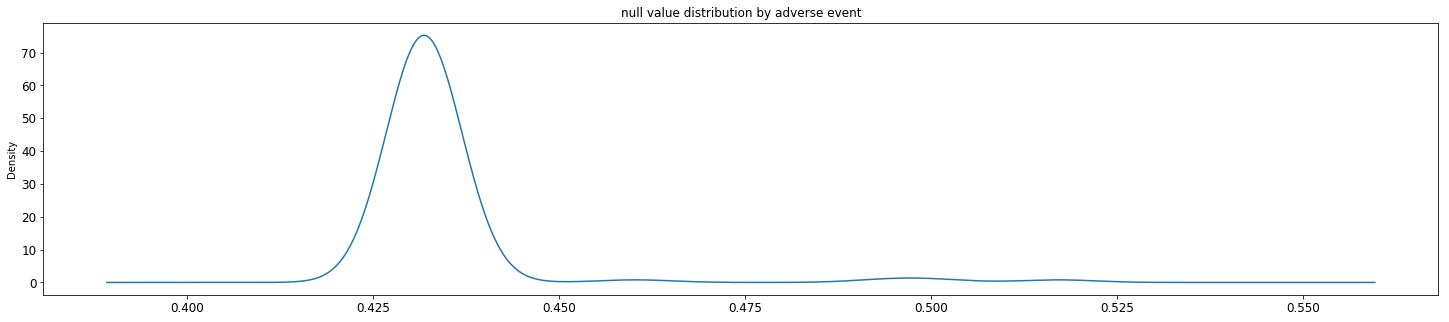

In [13]:
x = (final_df.isnull().sum(axis=0)/final_df.shape[0])
x.plot(kind= "kde", figsize = (25,5), fontsize = 12)
plt.title("null value distribution by adverse event")
plt.show()


In [14]:
"""
x = (final_df.isnull().sum(axis=0)/final_df.shape[0])
x.plot(kind= "bar", figsize = (25,5), fontsize = 8)
plt.title("null value distribution by adverse event")
plt.show()
"""

'\nx = (final_df.isnull().sum(axis=0)/final_df.shape[0])\nx.plot(kind= "bar", figsize = (25,5), fontsize = 8)\nplt.title("null value distribution by adverse event")\nplt.show()\n'

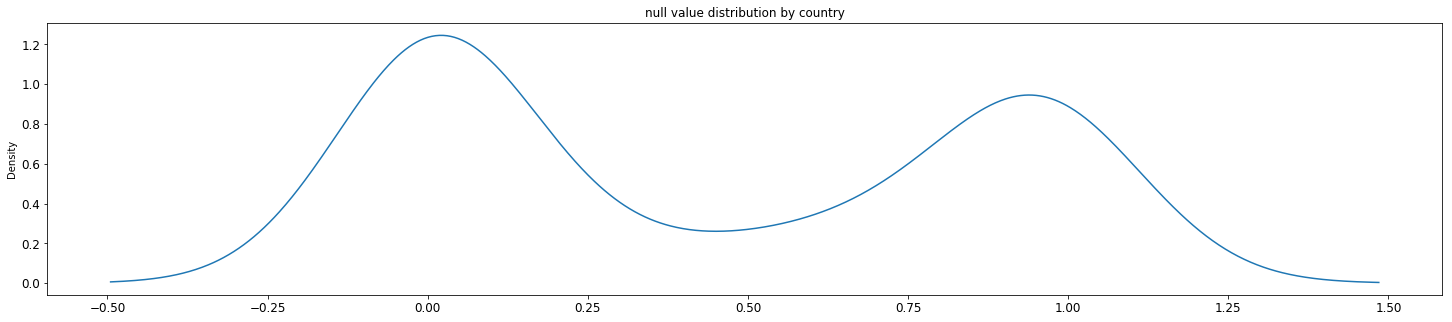

In [15]:
x = (final_df.isnull().sum(axis=1)/final_df.shape[1])
x.plot(kind= "kde", figsize = (25,5), fontsize = 12)
plt.title("null value distribution by country")
plt.show()

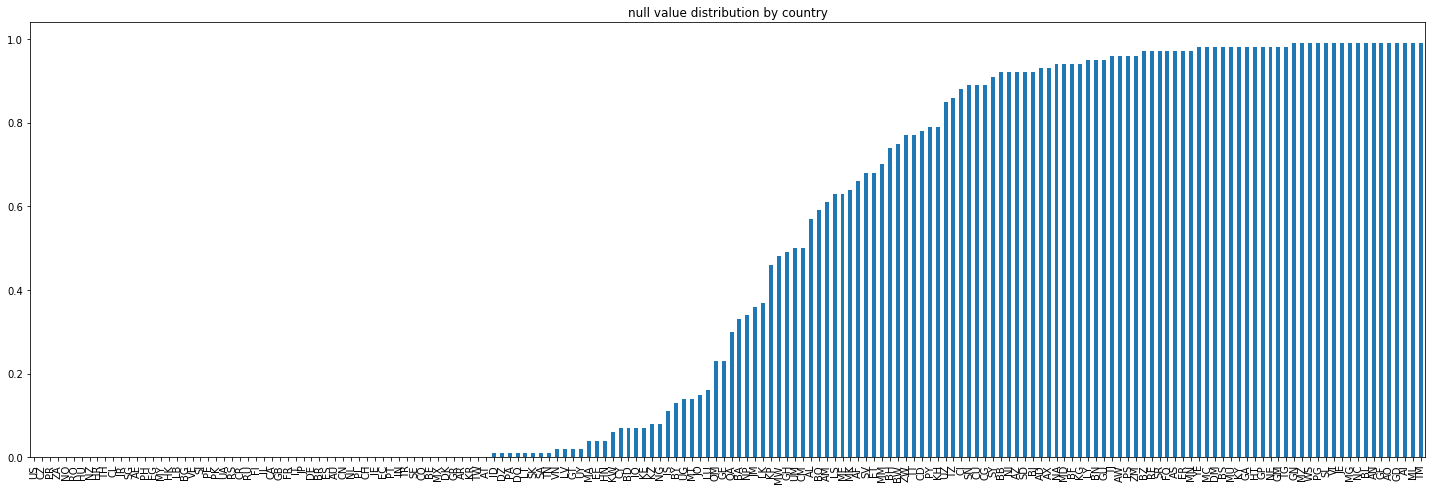

In [16]:
x = (final_df.isnull().sum(axis=1)/final_df.shape[1])
x.sort_values(ascending=True).plot(kind= "bar", figsize = (25,8), fontsize = 10)
plt.title("null value distribution by country")
plt.show()

#### Number of adverse events reported (by country)

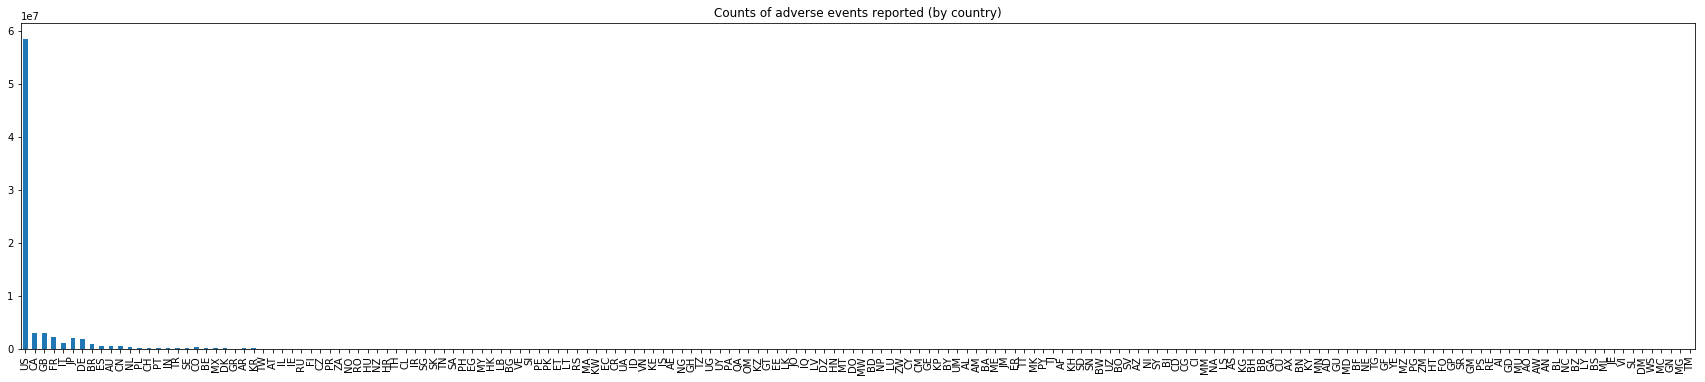

In [17]:
final_df.sum(axis=1).plot(kind="bar", figsize = (30,6))
plt.title("Counts of adverse events reported (by country)")
plt.show()

# the US is definitely OVER REPRESENTED!

##### Number of different adverse events reported by country (out of a total of 100 different possible events)

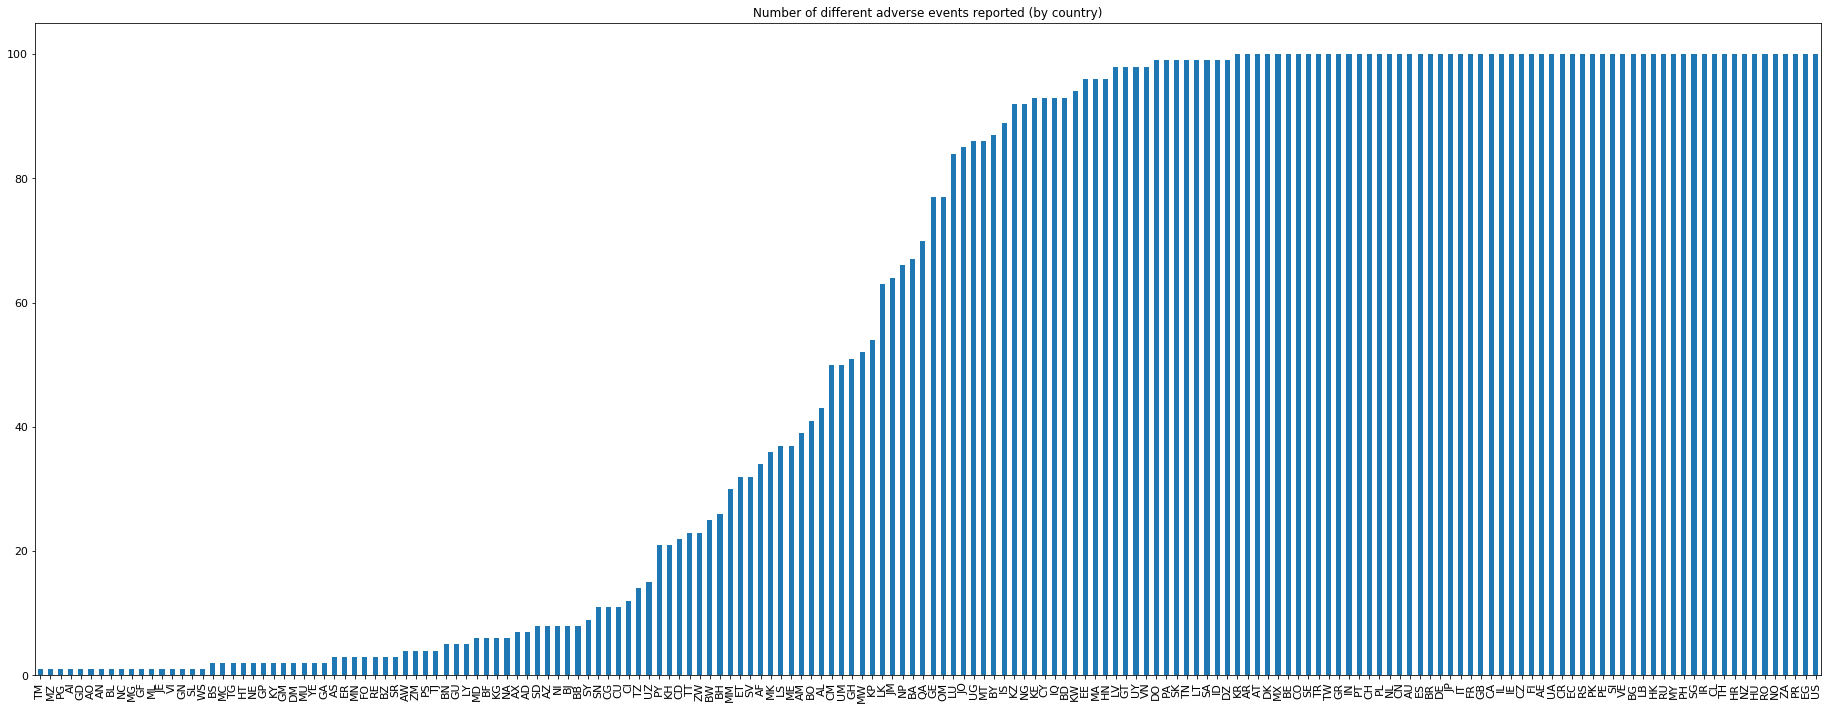

In [18]:
final_df.transpose().describe().loc["count"].sort_values().plot(kind="bar", figsize = (32,12), fontsize= 11)
plt.title("Number of different adverse events reported (by country)")

plt.show()

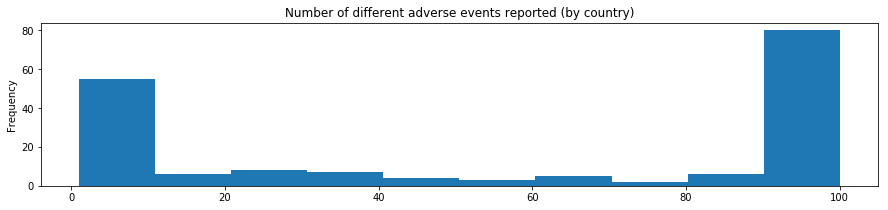

In [19]:
final_df.transpose().describe().loc["count"].plot(kind="hist", figsize = (15,3))
plt.title("Number of different adverse events reported (by country)")
plt.show()

In [20]:
# grouping countries into continents 

continents = pd.read_csv("./data/continents.csv")

continent_dict = {}
for i in continents.columns:
    k = list(continents[i].dropna())
    continent_dict.update(dict.fromkeys(k, i))
    
continent_df = final_df.copy()
continent_df["continent"] = [continent_dict.get(i) for i in final_df.index]
continent_df.head(3)

,ABDOMINAL DISCOMFORT,ABDOMINAL DISTENSION,ABDOMINAL PAIN,ABDOMINAL PAIN UPPER,ACUTE KIDNEY INJURY,ALOPECIA,ANAEMIA,ANXIETY,ARTHRALGIA,ASTHENIA,BACK PAIN,BLOOD GLUCOSE INCREASED,BLOOD PRESSURE INCREASED,CARDIAC FAILURE CONGESTIVE,CEREBROVASCULAR ACCIDENT,CHEST PAIN,CHILLS,CONDITION AGGRAVATED,CONFUSIONAL STATE,CONSTIPATION,COUGH,DEATH,DECREASED APPETITE,DEHYDRATION,DEPRESSION,DIARRHOEA,DIZZINESS,DRUG DOSE OMISSION,DRUG HYPERSENSITIVITY,DRUG INEFFECTIVE,DRUG INTERACTION,DRY SKIN,DYSPNOEA,ERYTHEMA,FALL,FATIGUE,FEELING ABNORMAL,FLUSHING,GAIT DISTURBANCE,GASTROINTESTINAL HAEMORRHAGE,HAEMOGLOBIN DECREASED,HAEMORRHAGE,HEADACHE,HOSPITALISATION,HYPERHIDROSIS,HYPERSENSITIVITY,HYPERTENSION,HYPOAESTHESIA,HYPOTENSION,INAPPROPRIATE SCHEDULE OF DRUG ADMINISTRATION,INCORRECT DOSE ADMINISTERED,INFECTION,INFLUENZA,INJECTION SITE ERYTHEMA,INJECTION SITE PAIN,INSOMNIA,LOSS OF CONSCIOUSNESS,MALAISE,MEMORY IMPAIRMENT,MUSCLE SPASMS,MUSCULAR WEAKNESS,MYALGIA,MYOCARDIAL INFARCTION,NASOPHARYNGITIS,NAUSEA,NEUTROPENIA,NO ADVERSE EVENT,OEDEMA PERIPHERAL,OFF LABEL USE,OVERDOSE,PAIN,PAIN IN EXTREMITY,PALPITATIONS,PARAESTHESIA,PERIPHERAL SWELLING,PNEUMONIA,PRODUCT DOSE OMISSION,PRODUCT QUALITY ISSUE,PRODUCT USE IN UNAPPROVED INDICATION,PRODUCT USE ISSUE,PRURITUS,PSORIASIS,PULMONARY EMBOLISM,PYREXIA,RASH,RENAL FAILURE,SEPSIS,SOMNOLENCE,SYNCOPE,THROMBOCYTOPENIA,TOXICITY TO VARIOUS AGENTS,TREMOR,URINARY TRACT INFECTION,URTICARIA,VISION BLURRED,VISUAL IMPAIRMENT,VOMITING,WEIGHT DECREASED,WEIGHT INCREASED,WRONG TECHNIQUE IN PRODUCT USAGE PROCESS,continent


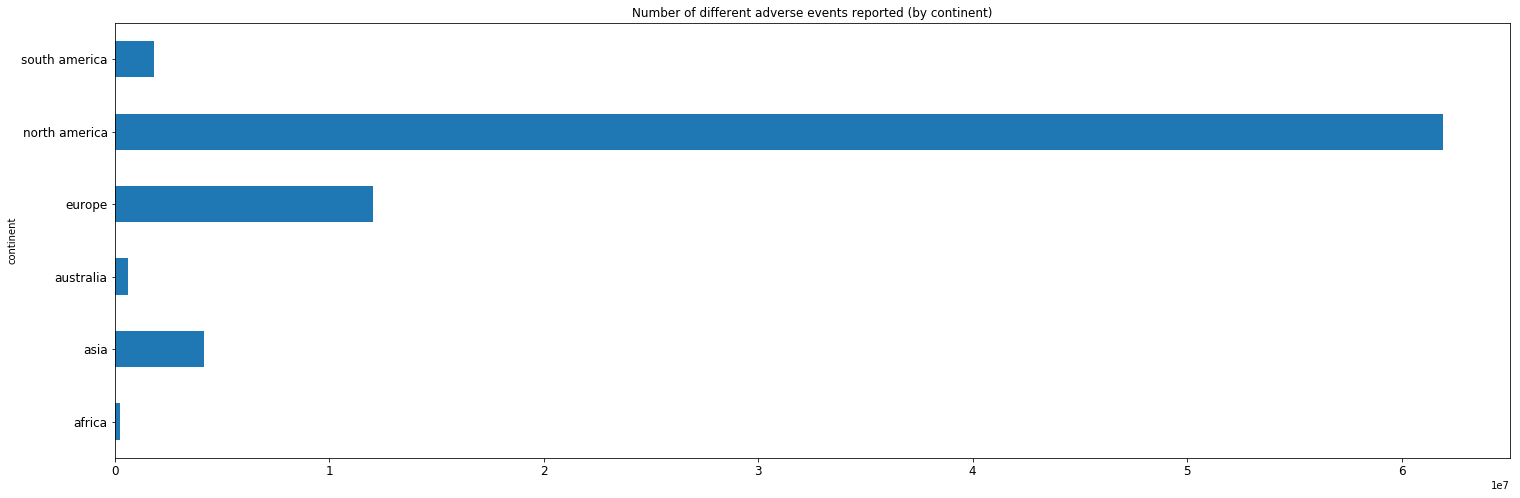

In [21]:
continent_df.groupby("continent").agg("sum").sum(axis=1).plot(kind="barh", figsize = (25,8), fontsize= 12)
plt.title("Number of different adverse events reported (by continent)")
plt.show()

##### Most common adverse events

In [22]:
common_by_country = final_df.idxmax(axis=1)
top_disease = common_by_country.value_counts()[:25].index

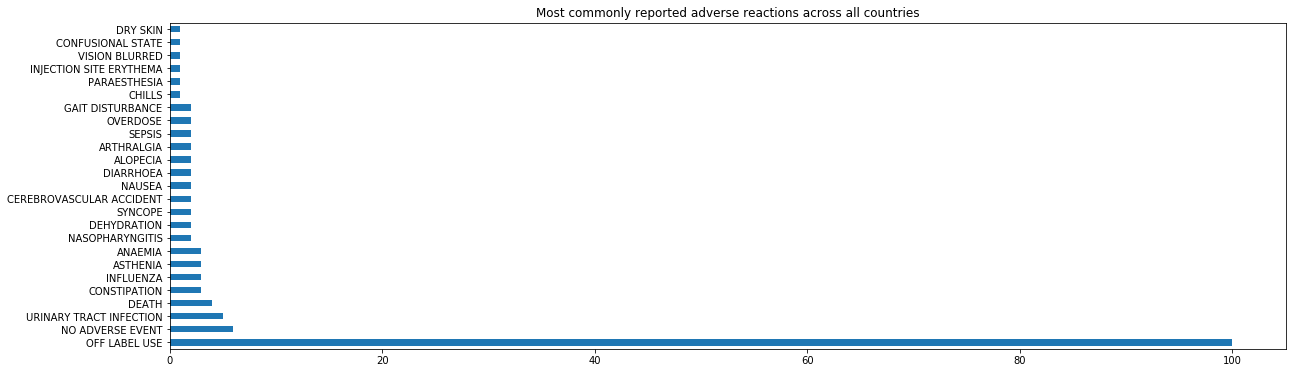

In [23]:
common_by_country.value_counts()[:25].plot(kind="barh", figsize=(20,6))
plt.title("Most commonly reported adverse reactions across all countries")
# by number of countries which report the specific adverse event as their most common one 
plt.show()

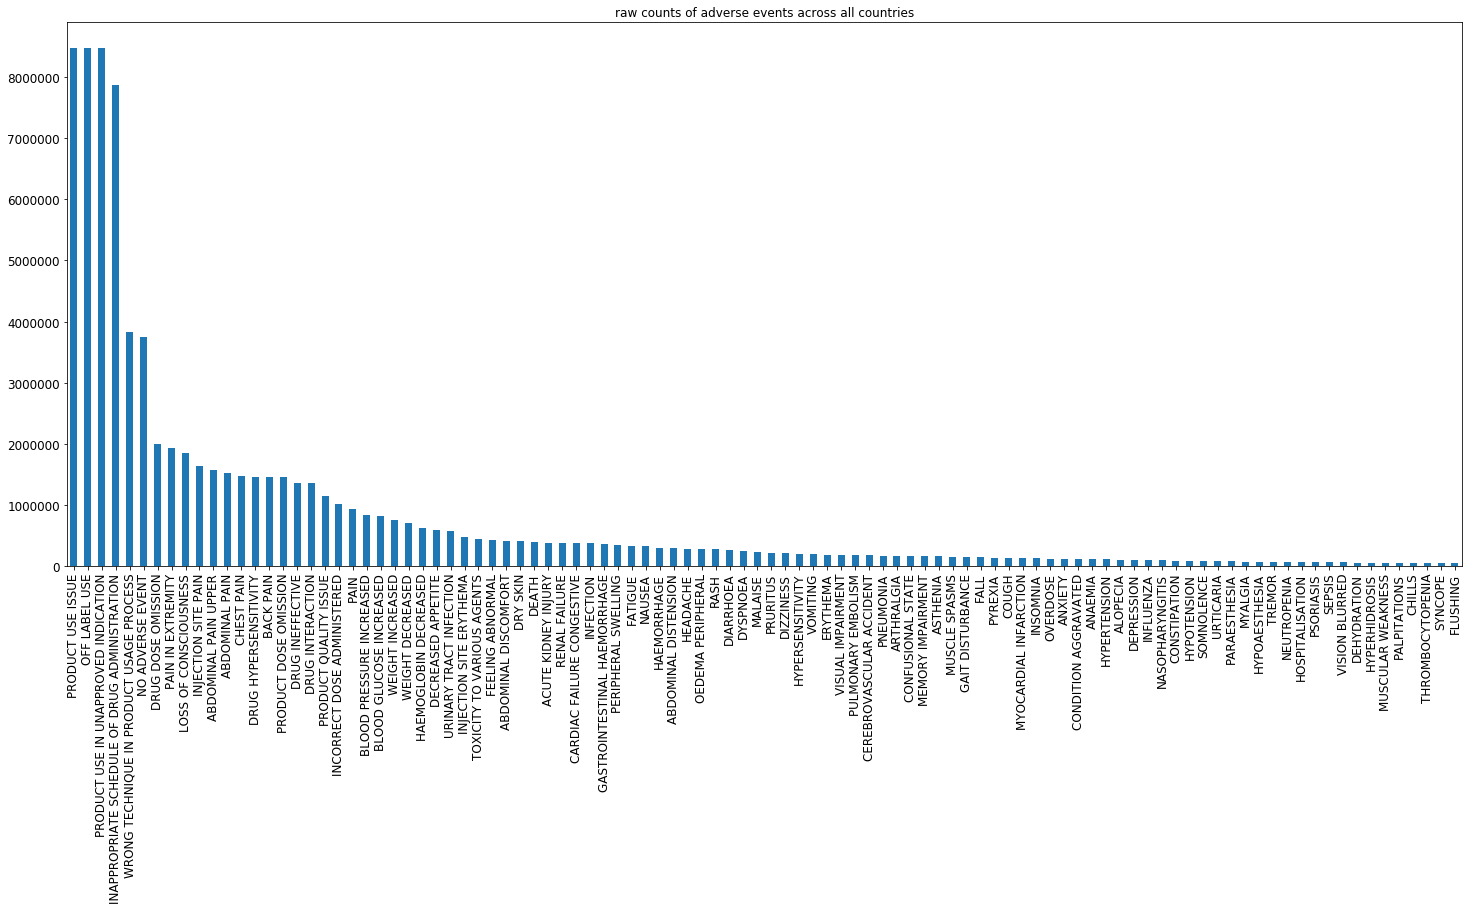

In [24]:
final_df.sum().sort_values(ascending=False).plot(kind = "bar", figsize= (25,10), fontsize=12)
plt.title("raw counts of adverse events across all countries")
plt.show()

#### Top 10 most common adverse events (by top 25 countries with most reported adverse events)

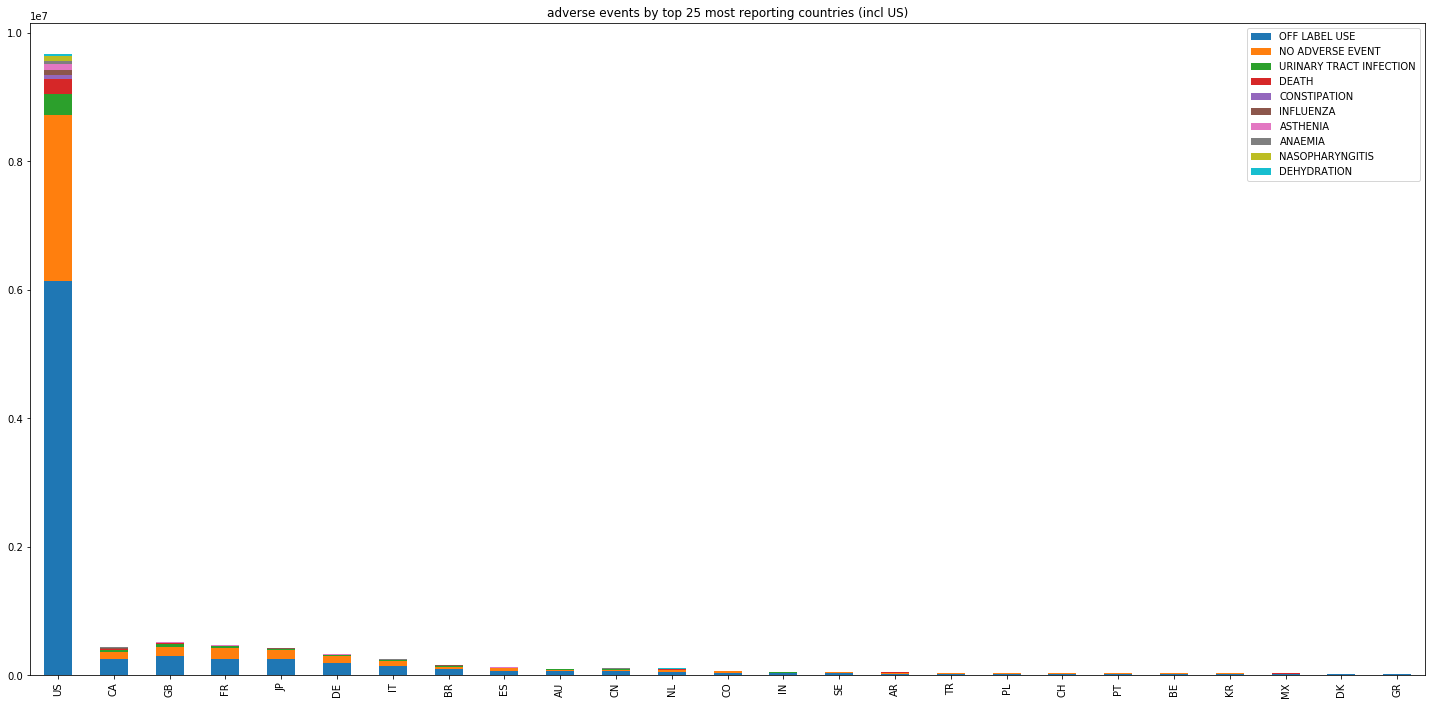

In [25]:
# Top 10 most common adverse events (by top 25 countries with most reported adverse events)
most_reported_events_by_country = final_df.sum(axis=1).sort_values(ascending=False)
top_countries = most_reported_events_by_country.index[:25]

final_df.loc[top_countries][top_disease[:10]].plot(kind="bar", figsize=(25,12), stacked = True)
plt.title("adverse events by top 25 most reporting countries (incl US)")
plt.show()

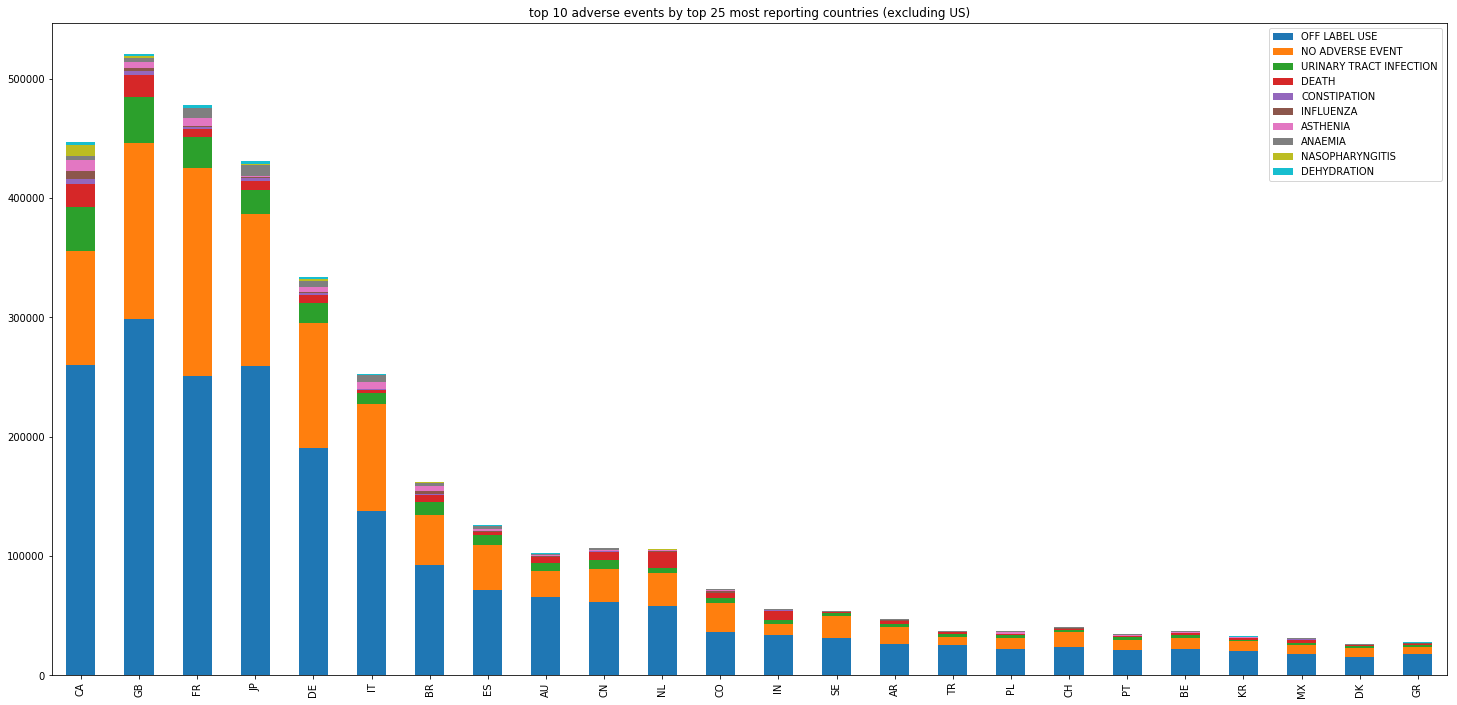

In [26]:
# Top 10 most common adverse events (by top 25 countries with most reported adverse events)
most_reported_events_by_country = final_df.sum(axis=1).sort_values(ascending=False)
top_countries = most_reported_events_by_country.index[:25]

final_df.loc[top_countries][top_disease[:10]].drop("US", axis=0).plot(kind="bar", figsize=(25,12), stacked = True)
plt.title("top 10 adverse events by top 25 most reporting countries (excluding US)")
plt.show()

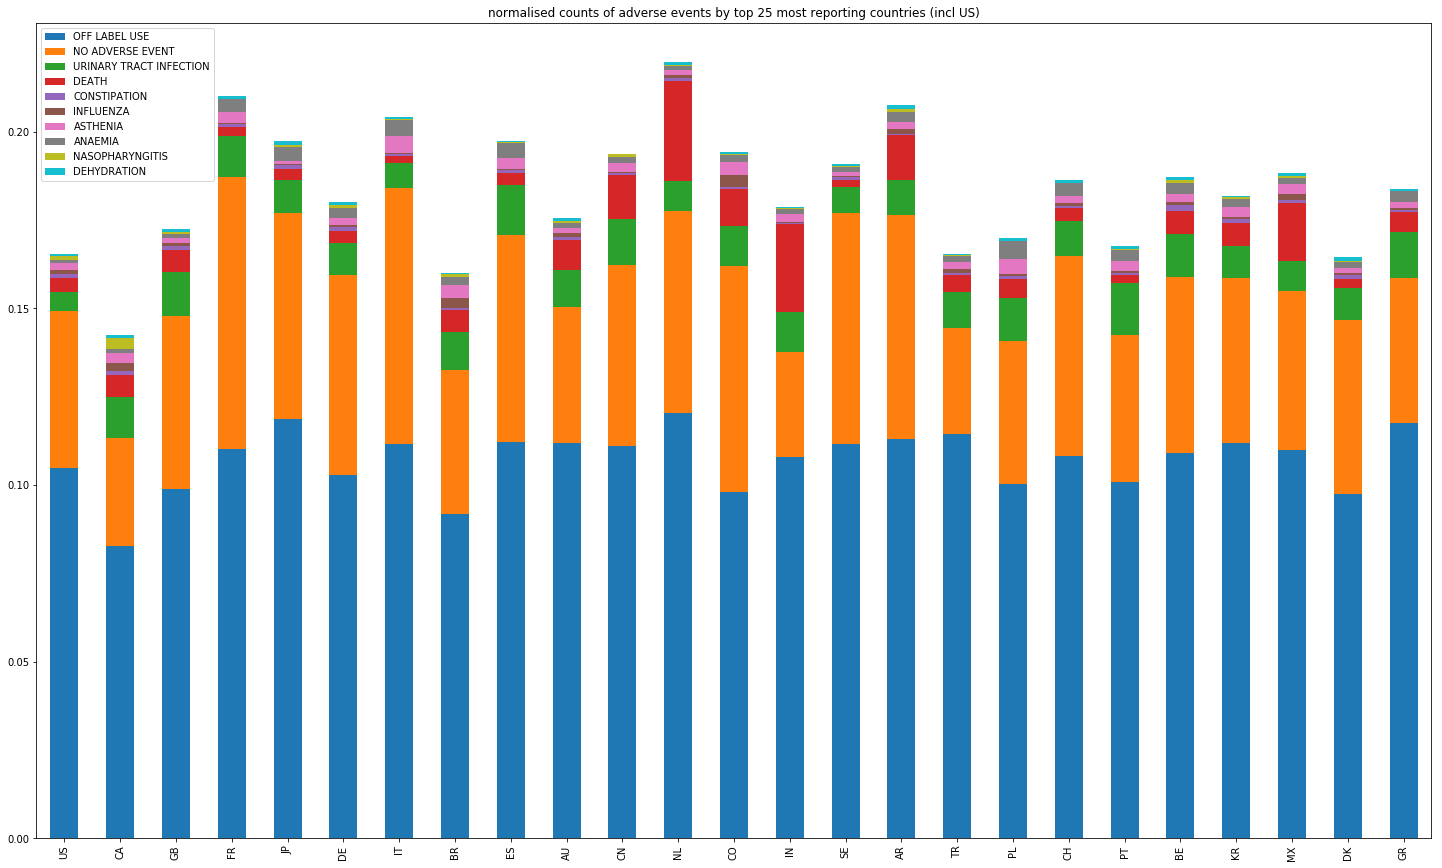

In [27]:
# NORMALISED - Top 10 most common adverse events (by top 25 countries with most reported adverse events)
norm_df = final_df.divide(final_df.sum(axis=1), axis=0)
norm_df.loc[top_countries][top_disease[:10]].plot(kind="bar", figsize=(25,15), stacked = True)
plt.title("normalised counts of adverse events by top 25 most reporting countries (incl US)")
plt.show()

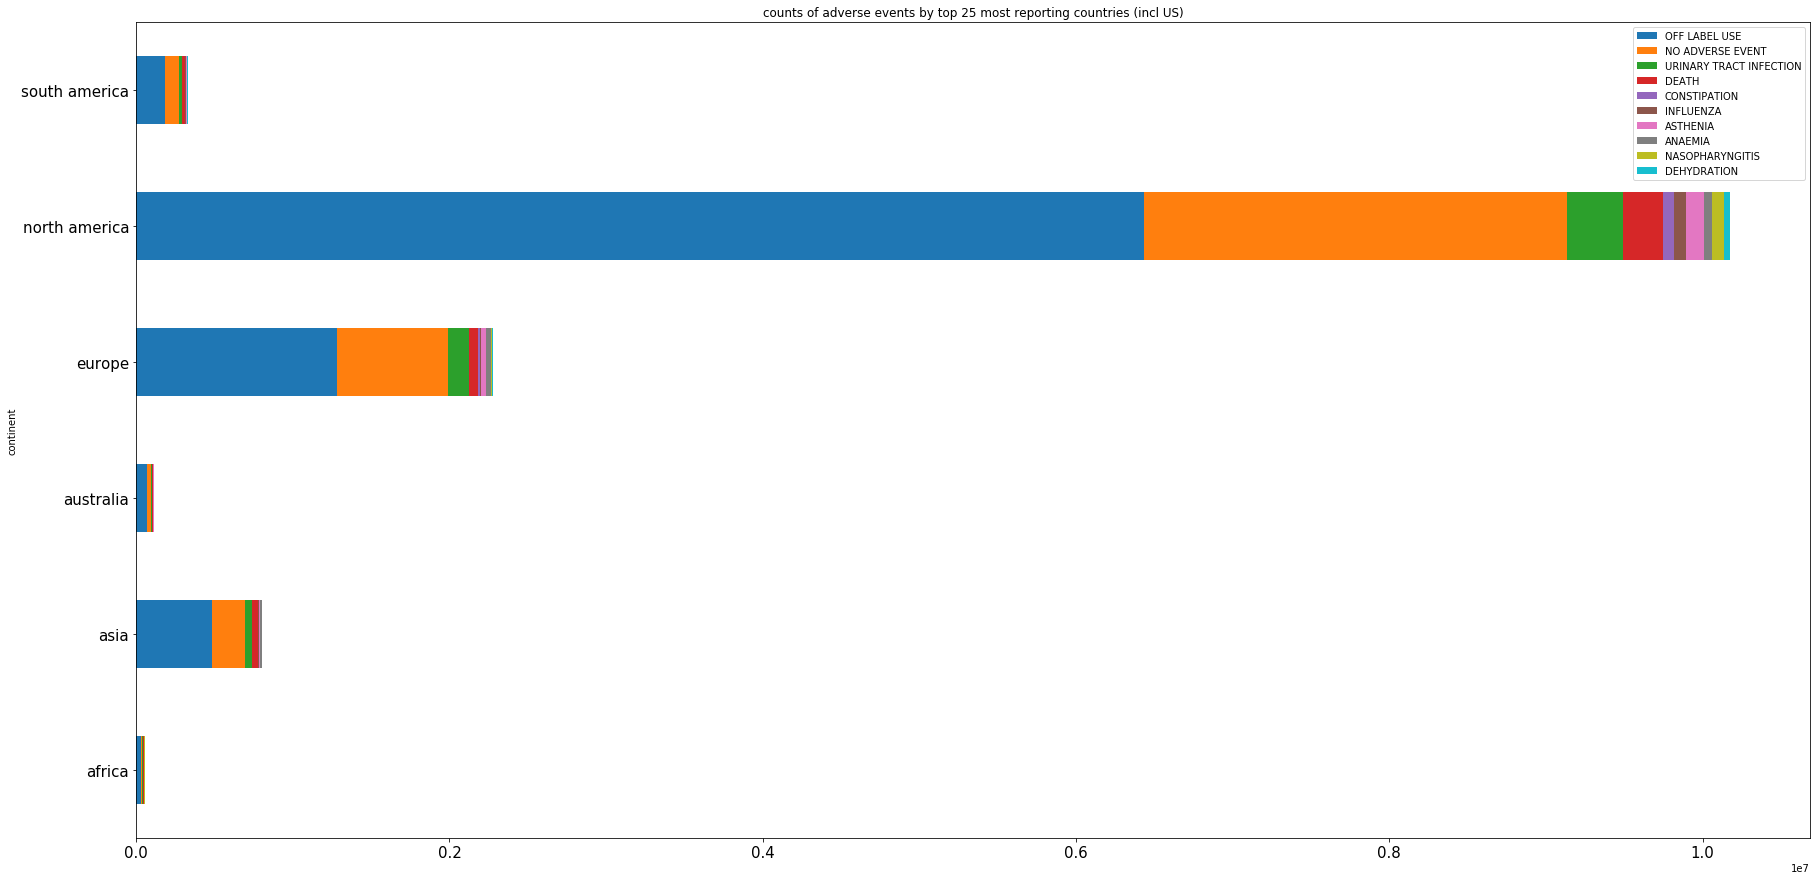

In [28]:
# NORMALISED - Top 10 most common adverse events (by continent)
continent_df.groupby("continent").agg("sum")[top_disease[:10]].plot(kind="barh", figsize=(30,15), 
                                                                    stacked = True, fontsize = 15)
plt.title("counts of adverse events by top 25 most reporting countries (incl US)")
plt.show()

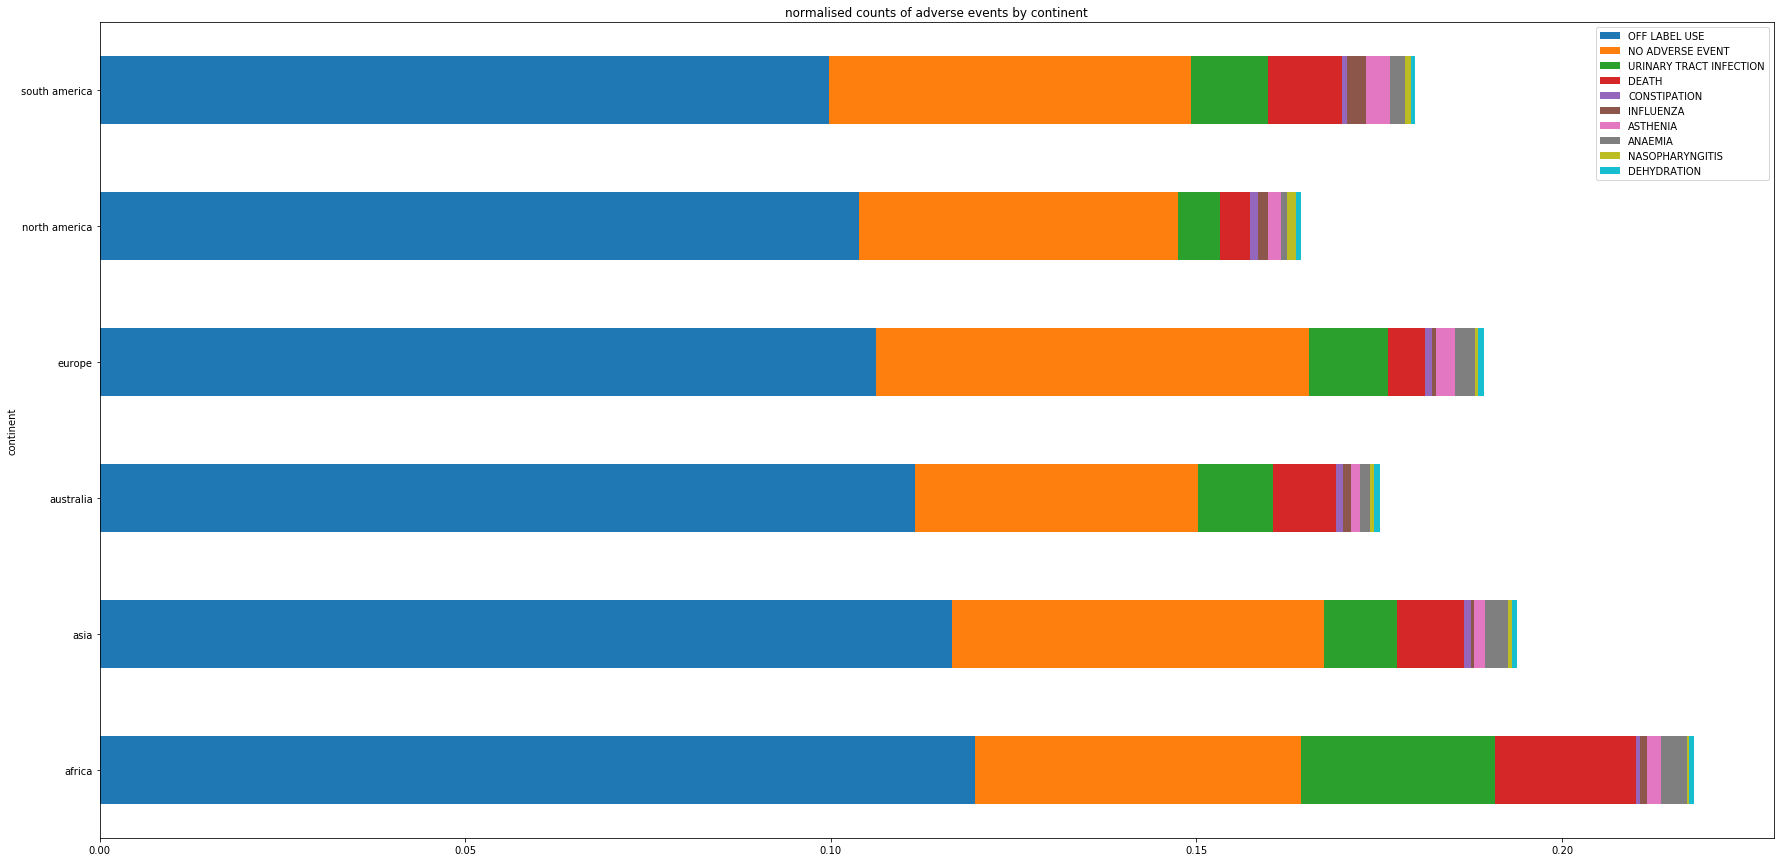

In [29]:
# NORMALISED - Top 10 most common adverse events (by continent)
continent_counts = continent_df.groupby("continent").agg("sum")
norm_continents = continent_counts.divide(continent_counts.sum(axis=1), axis=0)

norm_continents[top_disease[:10]].plot(kind="barh", figsize=(30,15), stacked = True)
plt.title("normalised counts of adverse events by continent")
plt.show()

### Who is reporting adverse drug reactions?

In [30]:
#get reporter data by country
URL = "https://api.fda.gov/drug/event.json?api_key=yLrGepa8vCdKPDdjd6MuU2iw05uIm1mZn7jaTbBl&search=primarysource.qualification:XXX&count=occurcountry.exact"
URL_x=[]
for i in range(1,6):
    URL_x.append(URL.replace("XXX", str(i)))
    
# download data and store in dataframe
df_append = []
for url in URL_x:
    data = requests.get(url).json()
    df = pd.DataFrame(data.get("results"))
    df.set_index("term", drop=True, inplace=True)
    df_append.append(df)

In [31]:
# concatenate 
reporter_dict = {1:"Physician", 2:"Pharmacist", 3:"Other health professional", 4:"Lawyer", 5:"Consumer or non-health professional"}
reporter_df = pd.concat(df_append, axis = 1)
reporter_df.columns = [reporter_dict.get(i) for i in range(1,6)]
reporter_df.shape

(121, 5)

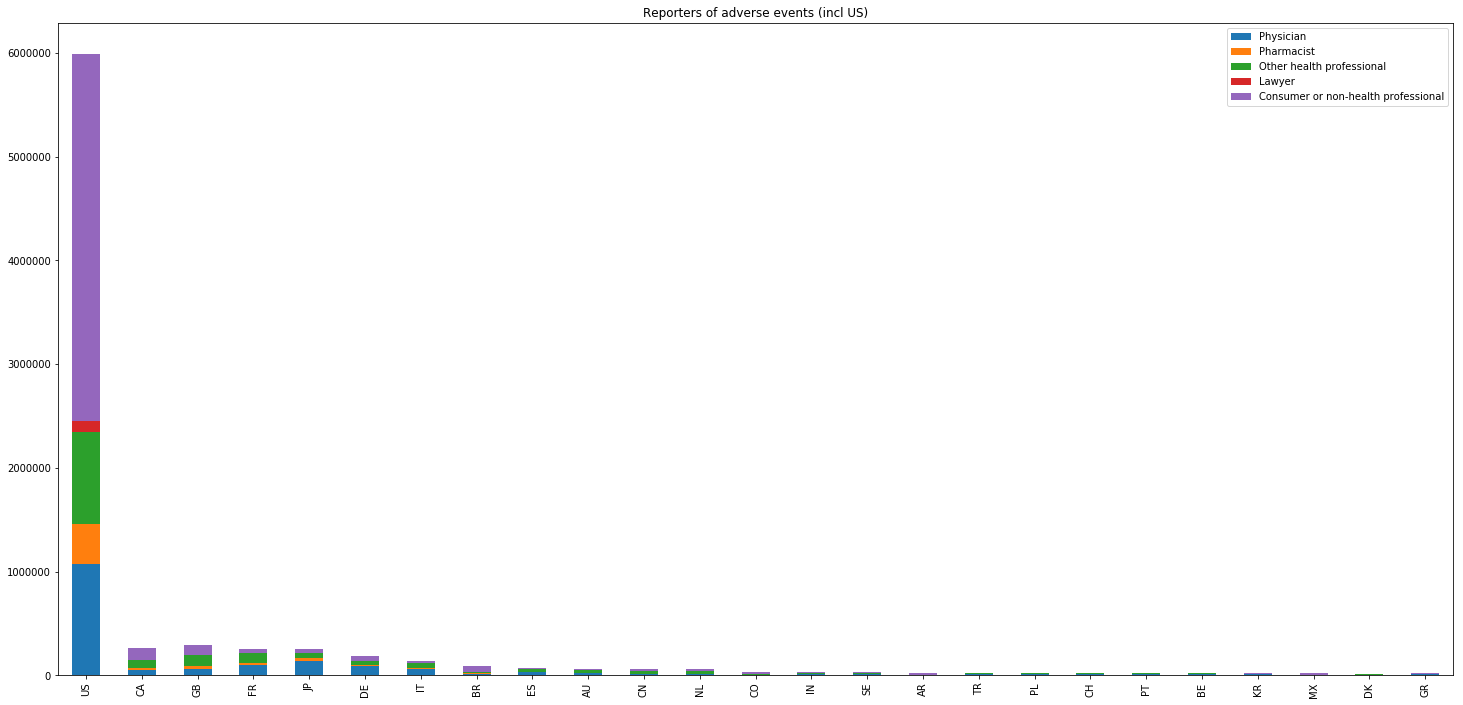

In [32]:
# Reporters of adverse events (incl US)

reporter_df.loc[top_countries].plot(kind="bar", figsize=(25,12), stacked = True)
plt.title("Reporters of adverse events (incl US)")
plt.show()

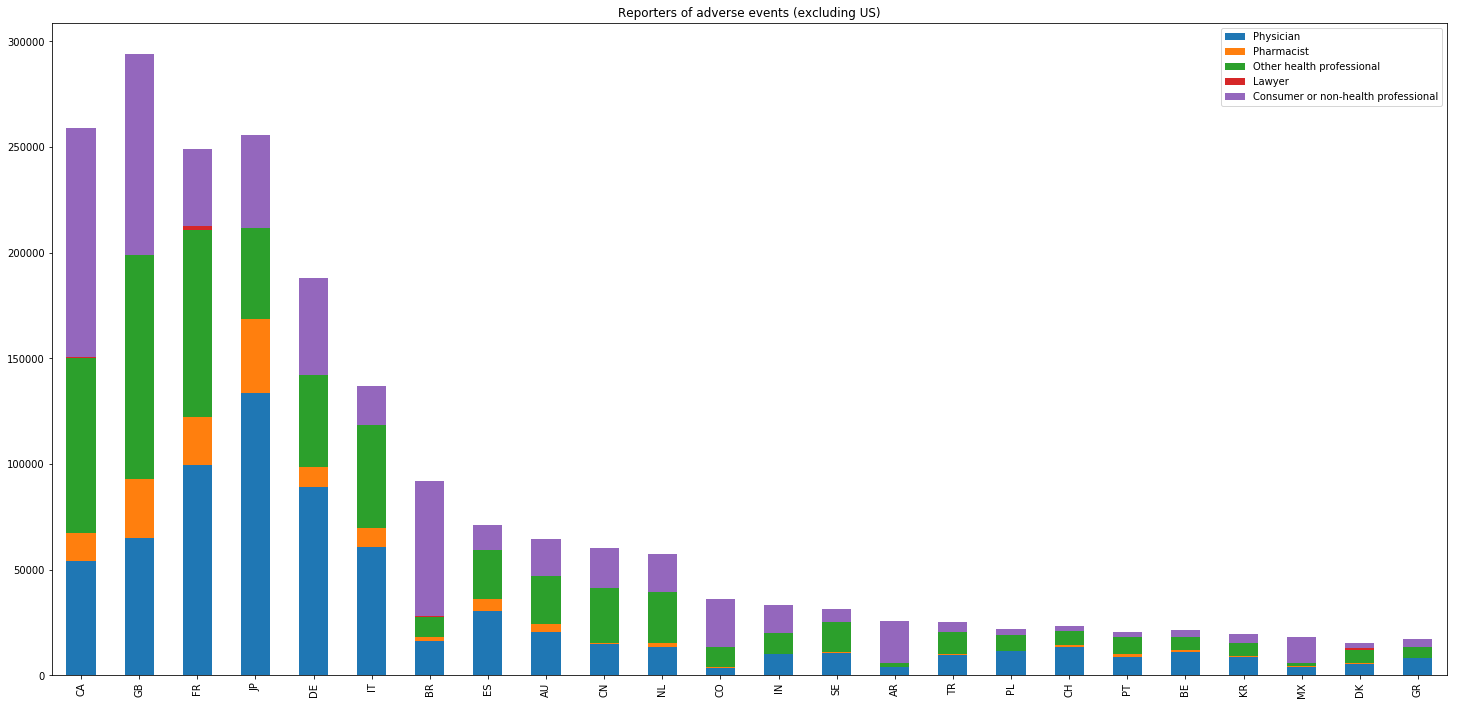

In [33]:
# Reporters of adverse events (excluding US)

reporter_df.loc[top_countries].drop("US", axis=0).plot(kind="bar", figsize=(25,12), stacked = True)
plt.title("Reporters of adverse events (excluding US)")
plt.show()

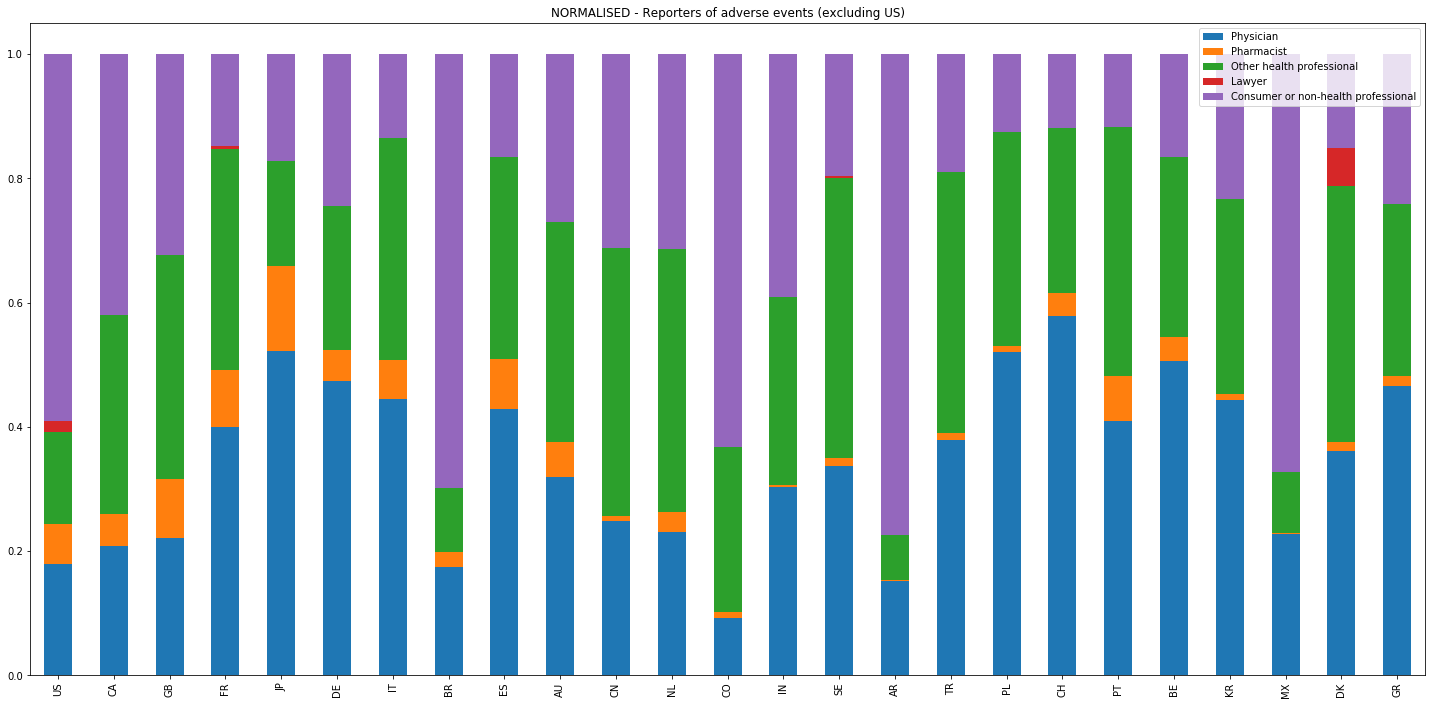

In [34]:
# NORMALISED - Reporters of adverse events (excluding US)

norm_reporter_df = reporter_df.divide(reporter_df.sum(axis=1), axis=0)
norm_reporter_df.loc[top_countries].plot(kind="bar", figsize=(25,12), stacked = True)
plt.title("NORMALISED - Reporters of adverse events (excluding US)")
plt.show()

##### Who is reporting off-label use?

In [35]:
#get off label reporter data
URL = "https://api.fda.gov/drug/event.json?api_key=yLrGepa8vCdKPDdjd6MuU2iw05uIm1mZn7jaTbBl&search=patient.reaction.reactionmeddrapt.exact:OFF+LABEL+USE&count=primarysource.qualification"
off_label_data = requests.get(URL).json()

In [36]:
off_label_df = pd.DataFrame(off_label_data.get("results"))
reporter_dict = {1:"Physician", 2:"Pharmacist", 3:"Other health professional", 4:"Lawyer", 5:"Consumer or non-health professional"}
off_label_df["reporter"] = [reporter_dict.get(i) for i in off_label_df.term]
off_label_df.drop(["term"], axis=1, inplace=True)

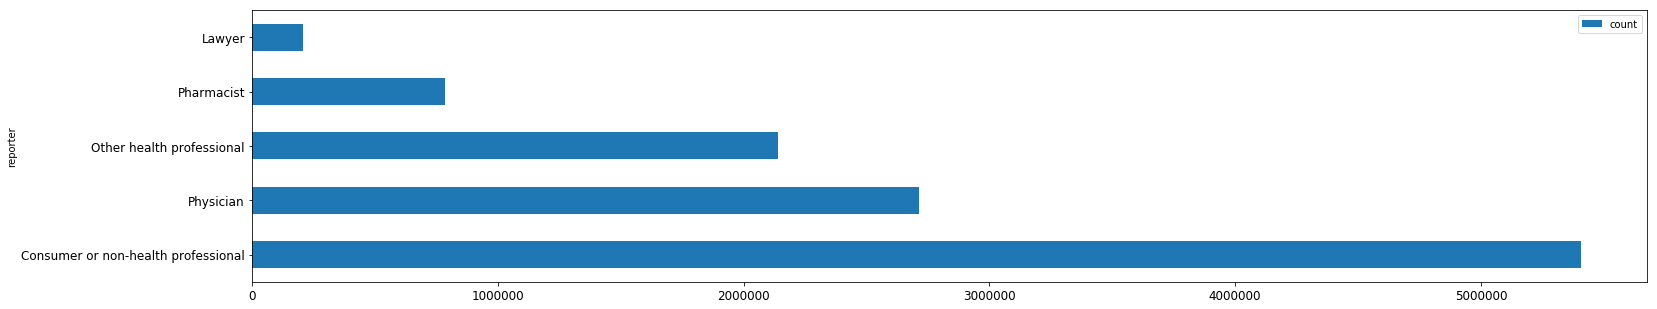

In [37]:
off_label_df.set_index("reporter", drop=True).plot(kind="barh", figsize = (25,5), fontsize=12)
plt.show()

### Serious events
##### serious event: adverse event resulted in death, a life threatening condition, hospitalization, disability, congenital anomaly, or other serious condition

In [38]:
# list of reactions
rxns = []
for i in rxn_counts.term:
    rxns.append(i)

# create list of URLS to get reaction counts for all countries
URL = "https://api.fda.gov/drug/event.json?api_key=yLrGepa8vCdKPDdjd6MuU2iw05uIm1mZn7jaTbBl&search=patient.reaction.reactionmeddrapt:XXX&count=serious"
URL_x=[]
for i in rxns:
    URL_x.append(URL.replace("XXX", i))

# download data and store in dataframe
df_append = []
for url in URL_x:
    data = requests.get(url).json()
    df = pd.DataFrame(data.get("results"))
    df.set_index("term", drop=True, inplace=True)
    df_append.append(df)

In [39]:
serious_df = pd.concat(df_append, axis=1)
serious_df.columns = rxns
serious_df.shape

(2, 100)

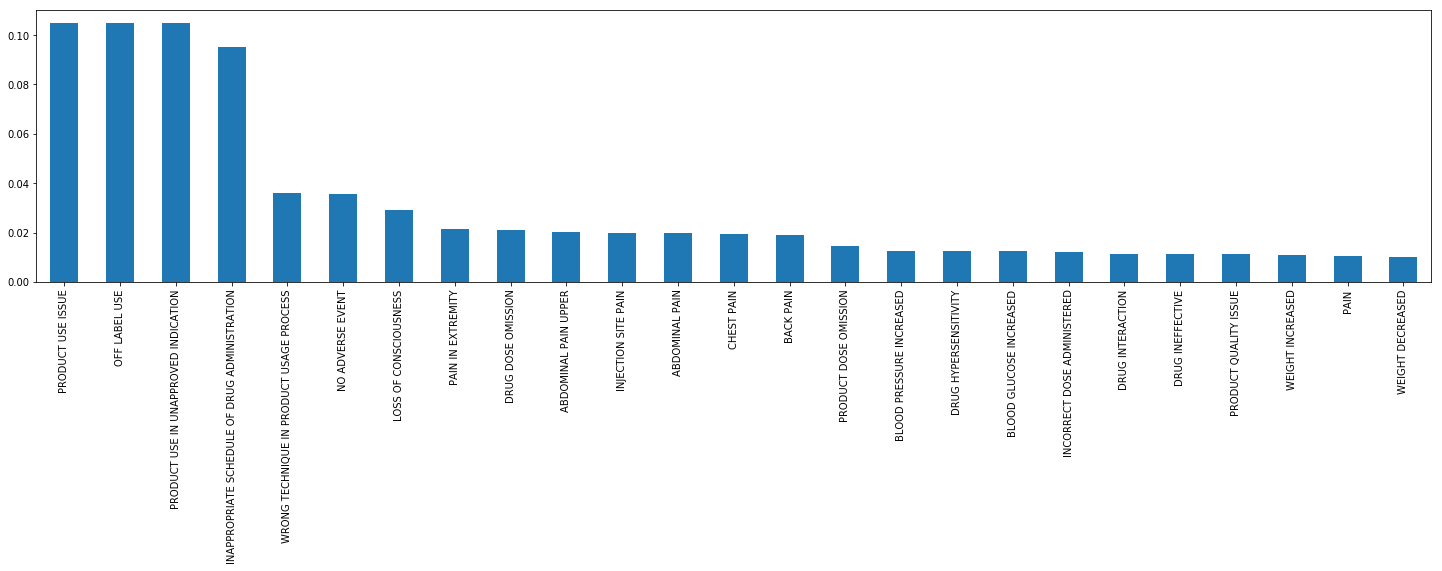

In [40]:
norm_serious_df = serious_df.divide(serious_df.sum(axis=1), axis=0)
norm_serious_df.T.sort_values(by=1, ascending=False).iloc[:25,0].plot(kind="bar", figsize = (25,5))
plt.show()

### GDP

In [41]:
gdp = pd.read_csv("./data/gdp_data.csv", usecols = ["Country Code", "IncomeGroup", "TableName"])
cc = pd.read_csv("./data/country_codes.csv")
latlong = pd.read_csv("./data/coordinates_mod.csv")



cc.columns = ["TableName","code"]
cc_df = cc.merge(gdp, on="TableName")

In [42]:
gdp_df = final_df.merge(cc_df, left_index=True, right_on = "code").drop(["Country Code", "TableName"],axis=1)
#.set_index("code", drop=True)

In [43]:
g = gdp_df.groupby(["IncomeGroup"]).sum()[top_disease[:10]]
norm_g = g.divide(g.sum(axis=1), axis=0)

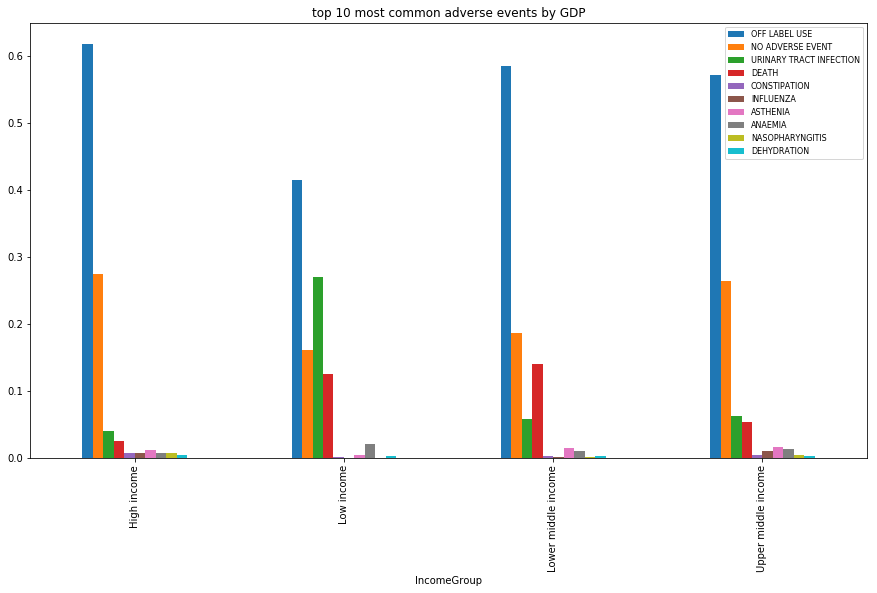

In [44]:
norm_g.plot(kind="bar", figsize=(15, 8), stacked=False)
plt.legend(fontsize=8, loc = 1)
plt.title("top 10 most common adverse events by GDP")
plt.show()

# Maps

In [45]:
gdp_map_df = gdp_df.merge(latlong, on="code")


In [46]:
# Assuming same lines from your example
# cols_to_norm = ['VOMITING','FATIGUE', 'COUGH', 'DEATH']
# gdp_map_df[cols_to_norm] = gdp_map_df[cols_to_norm].apply(lambda x: 100.0 * (x - x.min()) / (x.max() - x.min()))


In [47]:
itables.show(gdp_map_df, maxBytes = 0)

,ABDOMINAL DISCOMFORT,ABDOMINAL DISTENSION,ABDOMINAL PAIN,ABDOMINAL PAIN UPPER,ACUTE KIDNEY INJURY,ALOPECIA,ANAEMIA,ANXIETY,ARTHRALGIA,ASTHENIA,BACK PAIN,BLOOD GLUCOSE INCREASED,BLOOD PRESSURE INCREASED,CARDIAC FAILURE CONGESTIVE,CEREBROVASCULAR ACCIDENT,CHEST PAIN,CHILLS,CONDITION AGGRAVATED,CONFUSIONAL STATE,CONSTIPATION,COUGH,DEATH,DECREASED APPETITE,DEHYDRATION,DEPRESSION,DIARRHOEA,DIZZINESS,DRUG DOSE OMISSION,DRUG HYPERSENSITIVITY,DRUG INEFFECTIVE,DRUG INTERACTION,DRY SKIN,DYSPNOEA,ERYTHEMA,FALL,FATIGUE,FEELING ABNORMAL,FLUSHING,GAIT DISTURBANCE,GASTROINTESTINAL HAEMORRHAGE,HAEMOGLOBIN DECREASED,HAEMORRHAGE,HEADACHE,HOSPITALISATION,HYPERHIDROSIS,HYPERSENSITIVITY,HYPERTENSION,HYPOAESTHESIA,HYPOTENSION,INAPPROPRIATE SCHEDULE OF DRUG ADMINISTRATION,INCORRECT DOSE ADMINISTERED,INFECTION,INFLUENZA,INJECTION SITE ERYTHEMA,INJECTION SITE PAIN,INSOMNIA,LOSS OF CONSCIOUSNESS,MALAISE,MEMORY IMPAIRMENT,MUSCLE SPASMS,MUSCULAR WEAKNESS,MYALGIA,MYOCARDIAL INFARCTION,NASOPHARYNGITIS,NAUSEA,NEUTROPENIA,NO ADVERSE EVENT,OEDEMA PERIPHERAL,OFF LABEL USE,OVERDOSE,PAIN,PAIN IN EXTREMITY,PALPITATIONS,PARAESTHESIA,PERIPHERAL SWELLING,PNEUMONIA,PRODUCT DOSE OMISSION,PRODUCT QUALITY ISSUE,PRODUCT USE IN UNAPPROVED INDICATION,PRODUCT USE ISSUE,PRURITUS,PSORIASIS,PULMONARY EMBOLISM,PYREXIA,RASH,RENAL FAILURE,SEPSIS,SOMNOLENCE,SYNCOPE,THROMBOCYTOPENIA,TOXICITY TO VARIOUS AGENTS,TREMOR,URINARY TRACT INFECTION,URTICARIA,VISION BLURRED,VISUAL IMPAIRMENT,VOMITING,WEIGHT DECREASED,WEIGHT INCREASED,WRONG TECHNIQUE IN PRODUCT USAGE PROCESS,code,IncomeGroup,Country,code_3,lat,long


In [48]:
shapefile = 'countries_110m/ne_110m_admin_0_countries.shp'

gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']


In [49]:

#Perform left merge to preserve every row in gdf.
merged = gdf.merge(gdp_map_df, left_on = 'country_code', right_on = 'code_3', how = 'left')

#Replace NaN values to string 'No data'.
merged.fillna('No data', inplace = True)
 

In [50]:
#Read data to json
merged_json = json.loads(merged.to_json())

#Convert to str like object
json_data = json.dumps(merged_json)

In [51]:
def my_map(low_val = 0, high_val = 10000, adverse_event_name = "DEATH"):


    #Input GeoJSON source that contains features for plotting.
    geosource = GeoJSONDataSource(geojson = json_data)

    #Define a sequential multi-hue color palette.
    palette = brewer['YlGnBu'][8]

    #Reverse color order so that dark blue is highest obesity.
    palette = palette[::-1]

    #Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
    color_mapper = LinearColorMapper(palette = palette, low = low_val, high = high_val)

    #Define custom tick labels for color bar.
    # tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '400': '>40%'}

    #Create color bar. 
    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
    border_line_color=None,location = (0,0), orientation = 'horizontal')

    #Create figure object.
    p = figure(title = "Counts of adverse reactions related to {}".format(adverse_event_name), plot_height = 600 , plot_width = 950, toolbar_location = None)
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    #Add patch renderer to figure. 
    p.patches('xs','ys', source = geosource,fill_color = {'field' : adverse_event_name, 'transform' : color_mapper},
              line_color = 'black', line_width = 0.25, fill_alpha = 1)

    #Specify figure layout.
    p.add_layout(color_bar, 'below')

    #Display figure inline in Jupyter Notebook.
    output_notebook()

    #Display figure.
    show_bokeh(p)

In [52]:
from __future__ import print_function

from ipyleaflet import (
    Map,
    Marker, MarkerCluster, TileLayer, ImageOverlay, GeoJSON,
    Polyline, Polygon, Rectangle, Circle, CircleMarker, Popup,
    SplitMapControl, WidgetControl,
    basemaps, basemap_to_tiles
)

from ipywidgets import HTML

/Users/DGalaga/anaconda3/lib/python3.7/site-packages/xarray/core/merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [53]:
from ipywidgets import Text, HTML, HBox
from ipyleaflet import GeoJSON, WidgetControl, Map 
import json

In [54]:
m = Map(center = (25,-20), zoom = 2)

geo_json_data = json.load(open('merged_json_temp.json'))
geojson = GeoJSON(data=geo_json_data, hover_style={'color': 'black', 'dashArray': '5, 5', 'weight': 2})
m.add_layer(geojson)

html = HTML('''
    <h4>Adverse reaction counts</h4>
    Hover over a country
''')
html.layout.margin = '0px 20px 20px 20px'
control = WidgetControl(widget=html, position='topright')
m.add_control(control)

def update_html(properties, **kwargs):
    html.value = '''
        <h4>Count of reports with adverse reaction</h4>
        <h2><b>{}</b></h2>
        {} with adverse reaction of BACK PAIN 
    '''.format(properties['country'], properties['BACK PAIN'])

geojson.on_hover(update_html)

m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [55]:
my_map(low_val = 0, high_val = 10000, adverse_event_name = "BACK PAIN")

Loading BokehJS ...

# What are the different adverse events associated with different disease areas? 

In [56]:
# list of reactions
rxns = []
for i in rxn_counts.term:
    rxns.append(i)

# create list of URLS to get reaction counts for all indications
URL = "https://api.fda.gov/drug/event.json?api_key=yLrGepa8vCdKPDdjd6MuU2iw05uIm1mZn7jaTbBl&search=patient.reaction.reactionmeddrapt:XXX&count=patient.drug.drugindication.exact"
URL_x=[]
for i in rxns:
    URL_x.append(URL.replace("XXX", i))

# download data and store in dataframe
df_append = []
for url in URL_x:
    data = requests.get(url).json()
    df = pd.DataFrame(data.get("results"))
    df.set_index("term", drop=True, inplace=True)
    df_append.append(df)
    

In [57]:
# concatenate all diseases by indication

final_indication_df = pd.concat(df_append, axis = 1)
final_indication_df.columns = rxns
final_indication_df.shape

(444, 100)

In [58]:
final_indication_df = final_indication_df.reindex(sorted(final_indication_df.columns), axis=1)


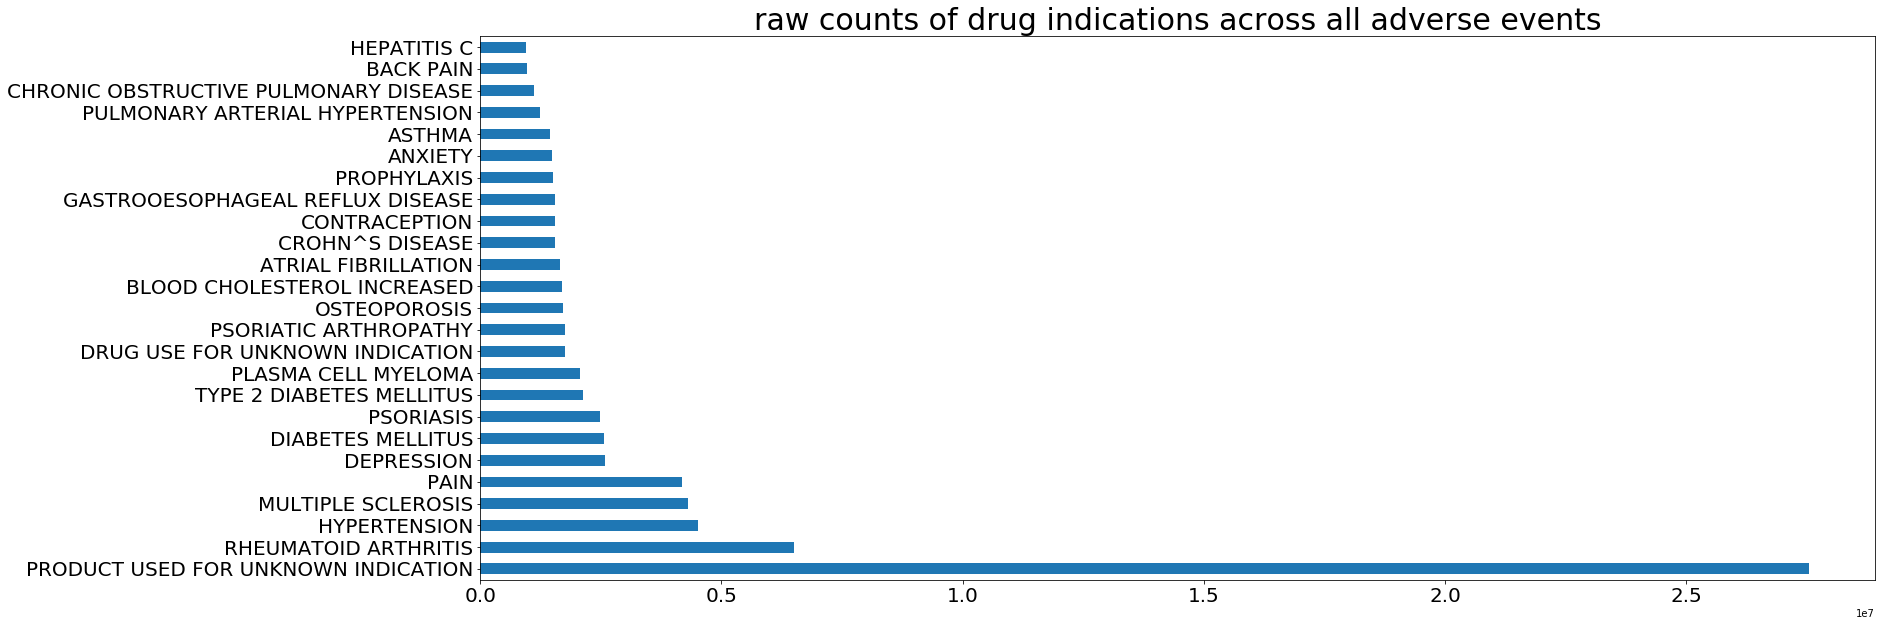

In [59]:
final_indication_df.sum(axis = 1).sort_values(ascending=False)[:25].plot(kind = "barh", figsize= (25,10), fontsize=20)
plt.title("raw counts of drug indications across all adverse events", fontsize=30)
plt.show()

In [60]:
show(final_indication_df, maxBytes=0)

,ABDOMINAL DISCOMFORT,ABDOMINAL DISTENSION,ABDOMINAL PAIN,ABDOMINAL PAIN UPPER,ACUTE KIDNEY INJURY,ALOPECIA,ANAEMIA,ANXIETY,ARTHRALGIA,ASTHENIA,BACK PAIN,BLOOD GLUCOSE INCREASED,BLOOD PRESSURE INCREASED,CARDIAC FAILURE CONGESTIVE,CEREBROVASCULAR ACCIDENT,CHEST PAIN,CHILLS,CONDITION AGGRAVATED,CONFUSIONAL STATE,CONSTIPATION,COUGH,DEATH,DECREASED APPETITE,DEHYDRATION,DEPRESSION,DIARRHOEA,DIZZINESS,DRUG DOSE OMISSION,DRUG HYPERSENSITIVITY,DRUG INEFFECTIVE,DRUG INTERACTION,DRY SKIN,DYSPNOEA,ERYTHEMA,FALL,FATIGUE,FEELING ABNORMAL,FLUSHING,GAIT DISTURBANCE,GASTROINTESTINAL HAEMORRHAGE,HAEMOGLOBIN DECREASED,HAEMORRHAGE,HEADACHE,HOSPITALISATION,HYPERHIDROSIS,HYPERSENSITIVITY,HYPERTENSION,HYPOAESTHESIA,HYPOTENSION,INAPPROPRIATE SCHEDULE OF DRUG ADMINISTRATION,INCORRECT DOSE ADMINISTERED,INFECTION,INFLUENZA,INJECTION SITE ERYTHEMA,INJECTION SITE PAIN,INSOMNIA,LOSS OF CONSCIOUSNESS,MALAISE,MEMORY IMPAIRMENT,MUSCLE SPASMS,MUSCULAR WEAKNESS,MYALGIA,MYOCARDIAL INFARCTION,NASOPHARYNGITIS,NAUSEA,NEUTROPENIA,NO ADVERSE EVENT,OEDEMA PERIPHERAL,OFF LABEL USE,OVERDOSE,PAIN,PAIN IN EXTREMITY,PALPITATIONS,PARAESTHESIA,PERIPHERAL SWELLING,PNEUMONIA,PRODUCT DOSE OMISSION,PRODUCT QUALITY ISSUE,PRODUCT USE IN UNAPPROVED INDICATION,PRODUCT USE ISSUE,PRURITUS,PSORIASIS,PULMONARY EMBOLISM,PYREXIA,RASH,RENAL FAILURE,SEPSIS,SOMNOLENCE,SYNCOPE,THROMBOCYTOPENIA,TOXICITY TO VARIOUS AGENTS,TREMOR,URINARY TRACT INFECTION,URTICARIA,VISION BLURRED,VISUAL IMPAIRMENT,VOMITING,WEIGHT DECREASED,WEIGHT INCREASED,WRONG TECHNIQUE IN PRODUCT USAGE PROCESS


In [61]:
final_indication_df_t = final_indication_df.transpose()
final_indication_df_t = final_indication_df_t.reindex(sorted(final_indication_df_t.columns), axis=1)



In [62]:
show(final_indication_df_t, maxBytes=0)

,ABDOMINAL DISCOMFORT,ABDOMINAL DISTENSION,ABDOMINAL PAIN,ABDOMINAL PAIN UPPER,ABNORMAL BEHAVIOUR,ABORTION INDUCED,ACCIDENTAL EXPOSURE,ACCIDENTAL EXPOSURE TO PRODUCT,ACNE,ACNE CYSTIC,ACROMEGALY,ACTINIC KERATOSIS,ACUTE CORONARY SYNDROME,ACUTE LYMPHOCYTIC LEUKAEMIA,ACUTE MYELOID LEUKAEMIA,ACUTE MYOCARDIAL INFARCTION,ADENOCARCINOMA OF COLON,AFFECTIVE DISORDER,AGE-RELATED MACULAR DEGENERATION,AGITATION,ALCOHOLISM,ALOPECIA,ANAEMIA,ANAESTHESIA,ANALGESIC THERAPY,ANDROGEN REPLACEMENT THERAPY,ANDROGENETIC ALOPECIA,ANGINA PECTORIS,ANKYLOSING SPONDYLITIS,ANTIBIOTIC PROPHYLAXIS,ANTIBIOTIC THERAPY,ANTICOAGULANT THERAPY,ANTIFUNGAL PROPHYLAXIS,ANTIPLATELET THERAPY,ANTIVIRAL PROPHYLAXIS,ANXIETY,ANXIETY DISORDER,APLASTIC ANAEMIA,ARRHYTHMIA,ARTERIOSCLEROSIS,ARTHRALGIA,ARTHRITIS,ARTHROPATHY,ASTHMA,ATRIAL FIBRILLATION,ATRIAL FLUTTER,ATTENTION DEFICIT/HYPERACTIVITY DISORDER,ATYPICAL HAEMOLYTIC URAEMIC SYNDROME,AUTOIMMUNE THYROIDITIS,B-CELL LYMPHOMA,BACK PAIN,BACTERIAL INFECTION,BASAL CELL CARCINOMA,BENIGN PROSTATIC HYPERPLASIA,BIPOLAR DISORDER,BIPOLAR I DISORDER,BLADDER CANCER,BLOOD CHOLESTEROL,BLOOD CHOLESTEROL ABNORMAL,BLOOD CHOLESTEROL INCREASED,BLOOD GLUCOSE ABNORMAL,BLOOD GLUCOSE INCREASED,BLOOD POTASSIUM DECREASED,BLOOD PRESSURE,BLOOD PRESSURE ABNORMAL,BLOOD PRESSURE INCREASED,BLOOD PRESSURE MEASUREMENT,BLOOD TESTOSTERONE DECREASED,BLOOD TRIGLYCERIDES,BLOOD TRIGLYCERIDES INCREASED,BONE DISORDER,BONE MARROW CONDITIONING REGIMEN,BRAIN NEOPLASM MALIGNANT,BREAKTHROUGH PAIN,BREAST CANCER,BREAST CANCER FEMALE,BREAST CANCER METASTATIC,BRONCHITIS,CANCER PAIN,CARCINOID SYNDROME,CARCINOID TUMOUR,CARDIAC DISORDER,CARDIAC FAILURE,CARDIAC FAILURE CHRONIC,CARDIAC FAILURE CONGESTIVE,CARDIOVASCULAR EVENT PROPHYLAXIS,CATAPLEXY,CELLULITIS,CEREBRAL INFARCTION,CEREBROVASCULAR ACCIDENT,CEREBROVASCULAR ACCIDENT PROPHYLAXIS,CHEMOTHERAPY,CHEST PAIN,CHOROIDAL NEOVASCULARISATION,CHRONIC HEPATITIS C,CHRONIC KIDNEY DISEASE,CHRONIC LYMPHOCYTIC LEUKAEMIA,CHRONIC MYELOID LEUKAEMIA,CHRONIC OBSTRUCTIVE PULMONARY DISEASE,CHRONIC SPONTANEOUS URTICARIA,COLITIS ULCERATIVE,COLON CANCER,COLONOSCOPY,COLORECTAL CANCER,COLORECTAL CANCER METASTATIC,COMPLETED SUICIDE,COMPUTERISED TOMOGRAM,COMPUTERISED TOMOGRAM ABDOMEN,CONDITION AGGRAVATED,CONSTIPATION,CONTRACEPTION,CONVULSION,CORONARY ARTERIAL STENT INSERTION,CORONARY ARTERY BYPASS,CORONARY ARTERY DISEASE,COUGH,CROHN'S DISEASE,CROHN^S DISEASE,CYSTIC FIBROSIS,CYTOMEGALOVIRUS INFECTION,DECREASED APPETITE,DEEP VEIN THROMBOSIS,DELUSION,DEMENTIA,DEMENTIA ALZHEIMER'S TYPE,DEMENTIA ALZHEIMER^S TYPE,DEPRESSION,DERMATITIS ATOPIC,DIABETES MELLITUS,DIABETES MELLITUS NON-INSULIN-DEPENDENT,DIABETIC NEUROPATHY,DIABETIC RETINAL OEDEMA,DIABETIC RETINOPATHY,DIAGNOSTIC PROCEDURE,DIARRHOEA,DIFFUSE LARGE B-CELL LYMPHOMA,DISTURBANCE IN ATTENTION,DIURETIC THERAPY,DIZZINESS,DRUG ABUSE,DRUG DEPENDENCE,DRUG USE FOR UNKNOWN INDICATION,DRY EYE,DRY SKIN,DYSLIPIDAEMIA,DYSPEPSIA,DYSPNOEA,EAR INFECTION,ECHOCARDIOGRAM,ECZEMA,EMBOLISM,EMBOLISM VENOUS,EMPHYSEMA,END STAGE RENAL DISEASE,ENDOMETRIOSIS,EPILEPSY,ERECTILE DYSFUNCTION,ERYTHEMA,ERYTHRODERMIC PSORIASIS,ESSENTIAL HYPERTENSION,EX-TOBACCO USER,FABRY'S DISEASE,FACTOR VIII DEFICIENCY,FATIGUE,FEBRILE NEUTROPENIA,FIBROMYALGIA,FLUID RETENTION,FLUSHING,FUNGAL INFECTION,GAIT DISTURBANCE,GASTRIC CANCER,GASTRIC DISORDER,GASTRITIS,GASTROINTESTINAL DISORDER,GASTROINTESTINAL HAEMORRHAGE,GASTROINTESTINAL STROMAL TUMOUR,GASTROOESOPHAGEAL REFLUX DISEASE,GENERALISED ANXIETY DISORDER,GLAUCOMA,GLIOBLASTOMA,GLIOBLASTOMA MULTIFORME,GOUT,GROWTH HORMONE DEFICIENCY,GROWTH OF EYELASHES,GUTTATE PSORIASIS,HAEMOLYTIC URAEMIC SYNDROME,HAEMORRHAGE,HAEMORRHAGE PROPHYLAXIS,HAIR GROWTH ABNORMAL,HALLUCINATION,HEADACHE,HELICOBACTER INFECTION,HEPATIC CIRRHOSIS,HEPATIC ENCEPHALOPATHY,HEPATITIS C,HEPATOCELLULAR CARCINOMA,HER-2 POSITIVE BREAST CANCER,HEREDITARY ANGIOEDEMA,HERPES ZOSTER,HIDRADENITIS,HIGH DENSITY LIPOPROTEIN DECREASED,HIGH DENSITY LIPOPROTEIN INCREASED,HIV INFECTION,HODGKIN^S DISEASE,HORMONE REPLACEMENT THERAPY,HORMONE THERAPY,HORMONE-

In [63]:
final_indication_df.sort_values(by = ['PRODUCT DOSE OMISSION'], inplace=True, ascending = False)

In [64]:
t_final_indication_df = final_indication_df.transpose()

In [65]:
t_final_indication_df.sort_values(by = ['OFF LABEL USE'], inplace=True, ascending = False)

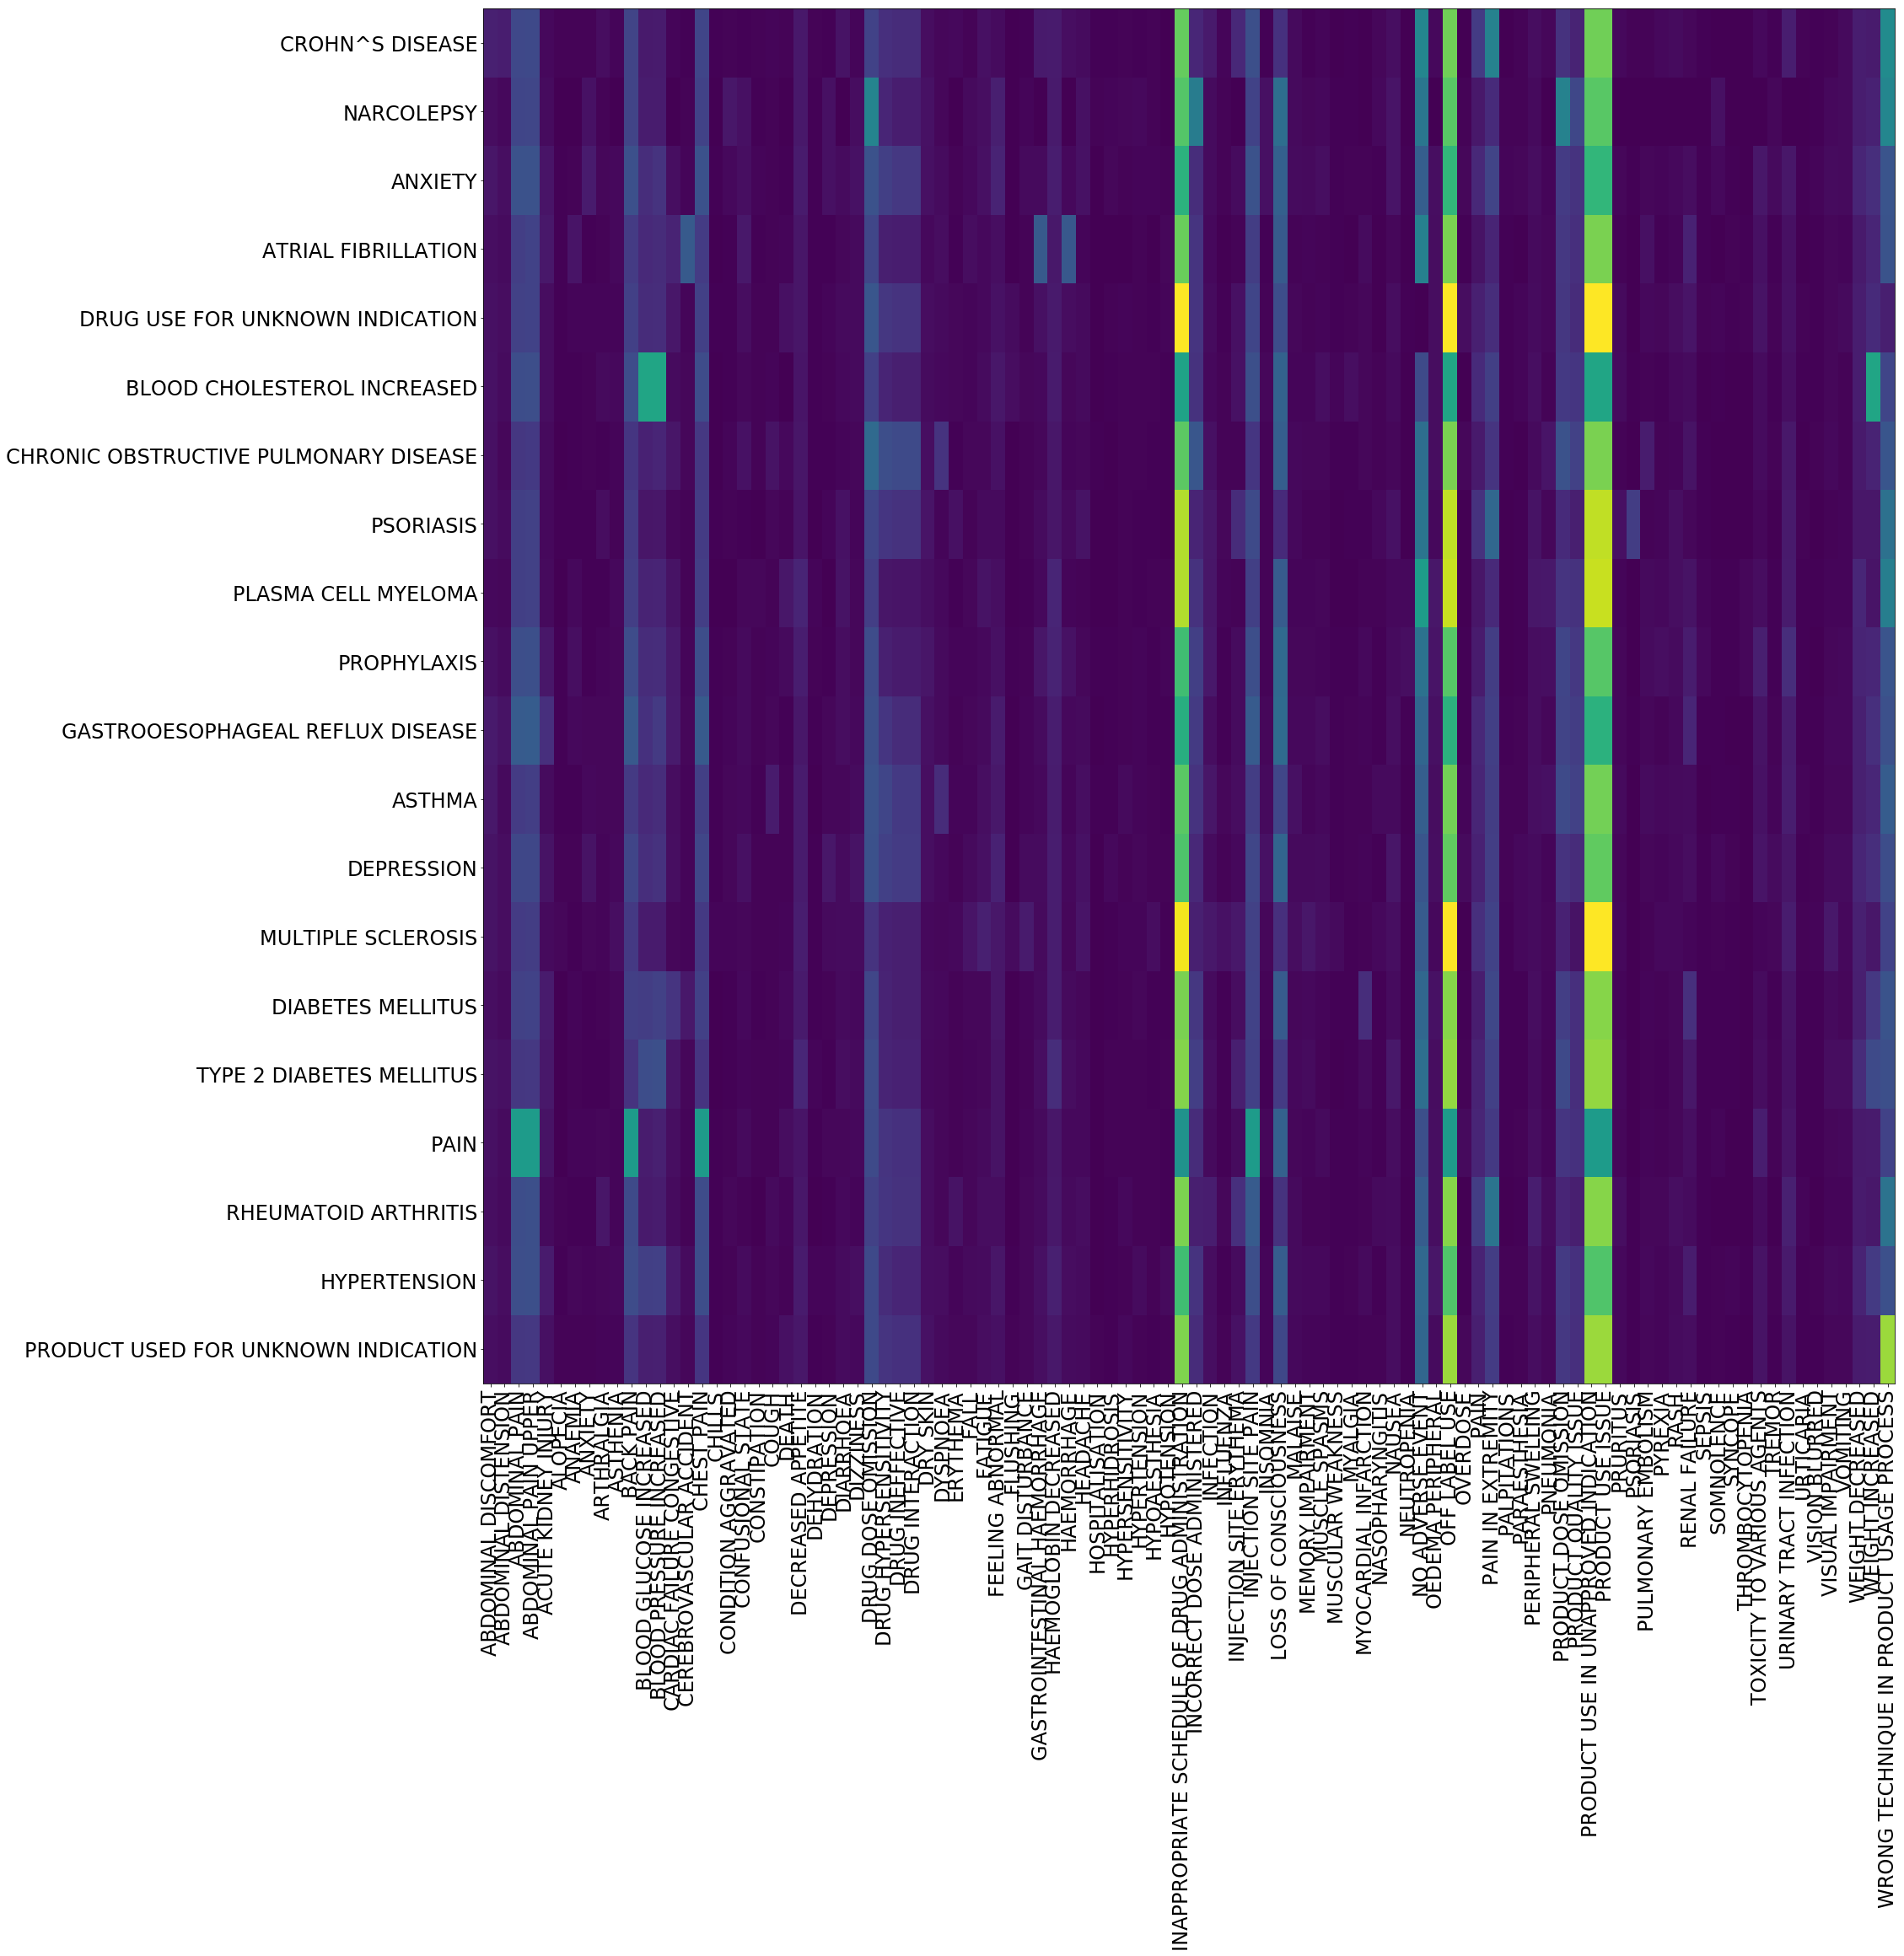

In [66]:
final_perc_df = final_indication_df.iloc[:20,:].apply(lambda x: x / x.sum() * 100.0 , axis = 1).fillna(value=0)
plt.figure(figsize=(30,30))

plt.pcolor(final_perc_df)
plt.yticks(np.arange(0.5, len(final_perc_df.index), 1), final_perc_df.index)
plt.xticks(np.arange(0.5, len(final_perc_df.columns), 1), final_perc_df.columns)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

plt.xticks(rotation=90)
plt.show()

In [67]:
# final_indication_df['MAX_INDICATION'] = final_indication_df.idxmax(axis=1)

In [68]:
final_indication_df[['OFF LABEL USE', 'DRUG INEFFECTIVE']]

,OFF LABEL USE,DRUG INEFFECTIVE


In [69]:
final_indication_copy = final_indication_df.copy()

In [70]:
final_indication_copy['INDICATION'] = final_indication_copy.index

In [71]:
top_rxn_df = final_indication_copy.groupby('INDICATION').apply(lambda x: x.set_index('INDICATION').sum().nlargest(10))


In [72]:
top_rxn_df = pd.DataFrame(top_rxn_df).reset_index()

In [73]:
top_rxn_df.columns = ['INDICATION', 'ADVERSE EVENT', 'COUNT']

In [74]:
# x = wb.get_series("SP.POP.TOTL", mrv=1, simplify_index=True)
show(top_rxn_df, maxBytes=0)


INDICATION,ADVERSE EVENT,COUNT


To further develop this code into a product used in practice, 
one option is to build the map with more interactive functionality.

For example, build a drop down for adverse events to show how the counts vary on a map.
Another drop down menu can show the number of specific indications per country.

An interactive dashboard using a map would be helpful.
Also, just having searchable tables with counts would make EDA much easier.

Overall, a better dashboard would be a positive tool to broaden the audience and help them understand the data faster and easier.